Projet - Analyse explo

In [1]:
# Chargement des librairies nécessaires
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : 'gridExtra'


L'objet suivant est masqué depuis 'package:dplyr':

    combine


Warning message:
"le package 'GGally' a été compilé avec la version R 4.4.2"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
"le package 'plotly' a été compilé avec la version R 4.4.2"

Attachement du package : 'plotly'


L'objet suivant est masqué depuis 'package:ggplot2':

    last_plot


L'objet suivant est masqué depuis 'package:stats':


In [2]:
options(repr.plot.width=15, repr.plot.height=8)


In [3]:
# Lecture des données
# path="http://www.math.univ-toulouse.fr/~besse/Wikistat/data/"
path <- ""
gym <- read.table(paste(path, "gym_members_exercise_tracking.csv", sep = ""),
                    sep = ",", header = TRUE)
# Premières lignes du jeu de données
head(gym)
# Vérification du contenu
summary(gym)

,Age,Gender,Weight..kg.,Height..m.,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration..hours.,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake..liters.,Workout_Frequency..days.week.,Experience_Level,BMI
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
2,46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
3,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
4,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
5,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
6,56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55


      Age           Gender           Weight..kg.       Height..m.   
 Min.   :18.00   Length:973         Min.   : 40.00   Min.   :1.500  
 1st Qu.:28.00   Class :character   1st Qu.: 58.10   1st Qu.:1.620  
 Median :40.00   Mode  :character   Median : 70.00   Median :1.710  
 Mean   :38.68                      Mean   : 73.85   Mean   :1.723  
 3rd Qu.:49.00                      3rd Qu.: 86.00   3rd Qu.:1.800  
 Max.   :59.00                      Max.   :129.90   Max.   :2.000  
    Max_BPM         Avg_BPM       Resting_BPM    Session_Duration..hours.
 Min.   :160.0   Min.   :120.0   Min.   :50.00   Min.   :0.500           
 1st Qu.:170.0   1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040           
 Median :180.0   Median :143.0   Median :62.00   Median :1.260           
 Mean   :179.9   Mean   :143.8   Mean   :62.22   Mean   :1.256           
 3rd Qu.:190.0   3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460           
 Max.   :199.0   Max.   :169.0   Max.   :74.00   Max.   :2.000           

In [4]:
gym[,'Gender'] <- as.factor(gym[,'Gender'])
gym[,'Workout_Type'] <- as.factor(gym[,'Workout_Type'])
gym[,'Experience_Level'] <- as.factor(gym[,'Experience_Level'])
gym[,'Workout_Frequency..days.week.'] <- as.factor(gym[,'Workout_Frequency..days.week.'])

In [5]:
summary(gym)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


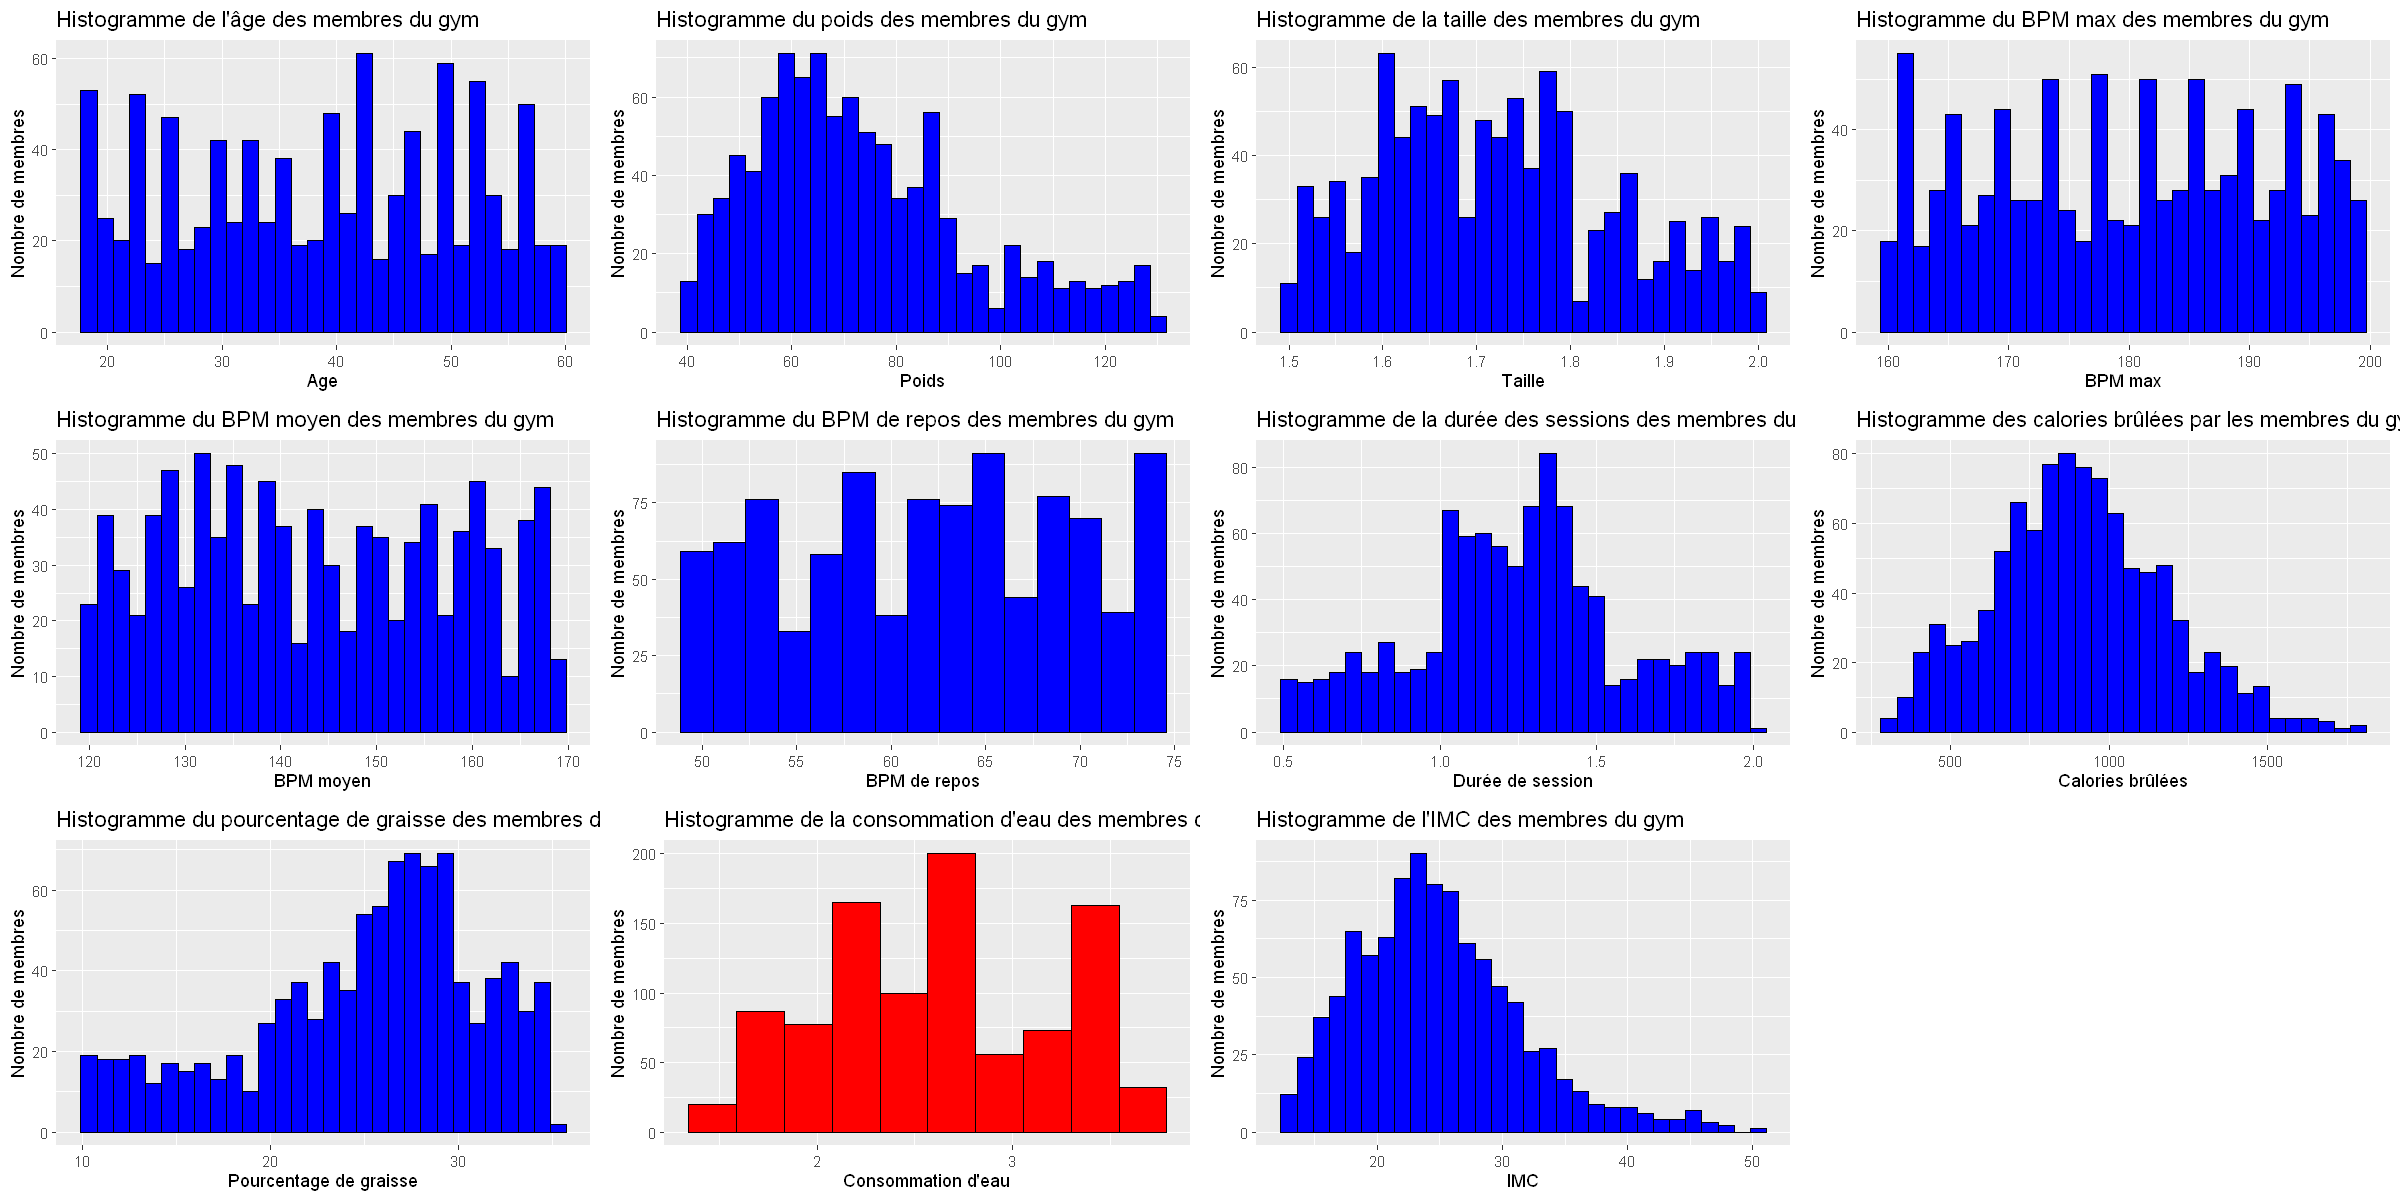

In [6]:
# Age	Gender	Weight..kg.	Height..m.	Max_BPM	Avg_BPM	Resting_BPM	Session_Duration..hours.	Calories_Burned	Workout_Type	Fat_Percentage	Water_Intake..liters.	Workout_Frequency..days.week.	Experience_Level	BMI
options(repr.plot.width=20, repr.plot.height=10)

g1<- ggplot(gym, aes(Age)) + geom_histogram( fill = "blue", color = "black") + labs(title = "Histogramme de l'âge des membres du gym", x = "Age", y = "Nombre de membres")
g2<- ggplot(gym, aes(Weight..kg.)) + geom_histogram( fill = "blue", color = "black") + labs(title = "Histogramme du poids des membres du gym", x = "Poids", y = "Nombre de membres")
g3<- ggplot(gym, aes(Height..m.)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme de la taille des membres du gym", x = "Taille", y = "Nombre de membres")
g4 <- ggplot(gym, aes(Max_BPM)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme du BPM max des membres du gym", x = "BPM max", y = "Nombre de membres")
g5 <- ggplot(gym, aes(Avg_BPM)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme du BPM moyen des membres du gym", x = "BPM moyen", y = "Nombre de membres")
g6 <- ggplot(gym, aes(Resting_BPM)) + geom_histogram(bins=15, fill = "blue", color = "black") + labs(title = "Histogramme du BPM de repos des membres du gym", x = "BPM de repos", y = "Nombre de membres")
g7 <- ggplot(gym, aes(Session_Duration..hours.)) + geom_histogram( fill = "blue", color = "black") + labs(title = "Histogramme de la durée des sessions des membres du gym", x = "Durée de session", y = "Nombre de membres")
g8 <- ggplot(gym, aes(Calories_Burned)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme des calories brûlées par les membres du gym", x = "Calories brûlées", y = "Nombre de membres")
g9 <- ggplot(gym, aes(Fat_Percentage)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme du pourcentage de graisse des membres du gym", x = "Pourcentage de graisse", y = "Nombre de membres")
g10 <- ggplot(gym, aes(Water_Intake..liters.)) + geom_histogram(bins=10, fill = "red", color = "black") + labs(title = "Histogramme de la consommation d'eau des membres du gym", x = "Consommation d'eau", y = "Nombre de membres")
g12 <- ggplot(gym, aes(BMI)) + geom_histogram( fill = "blue", color = "black") + labs(title = "Histogramme de l'IMC des membres du gym", x = "IMC", y = "Nombre de membres")

grid.arrange(g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g12, ncol = 4)
rm(g1, g2, g3, g4, g5, g6, g7, g8, g9, g10,  g12)

## Transformation de variables

In [7]:
gym[, "SBMI"] <- sqrt(gym[,"BMI"])
gym[, "LBMI"] <- log(gym[,"BMI"])
gym[, "LWeight"] <- log(gym[,"Weight..kg."])
gym[, "SFat_Percentage"] <- sqrt(gym[,"Fat_Percentage"])

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


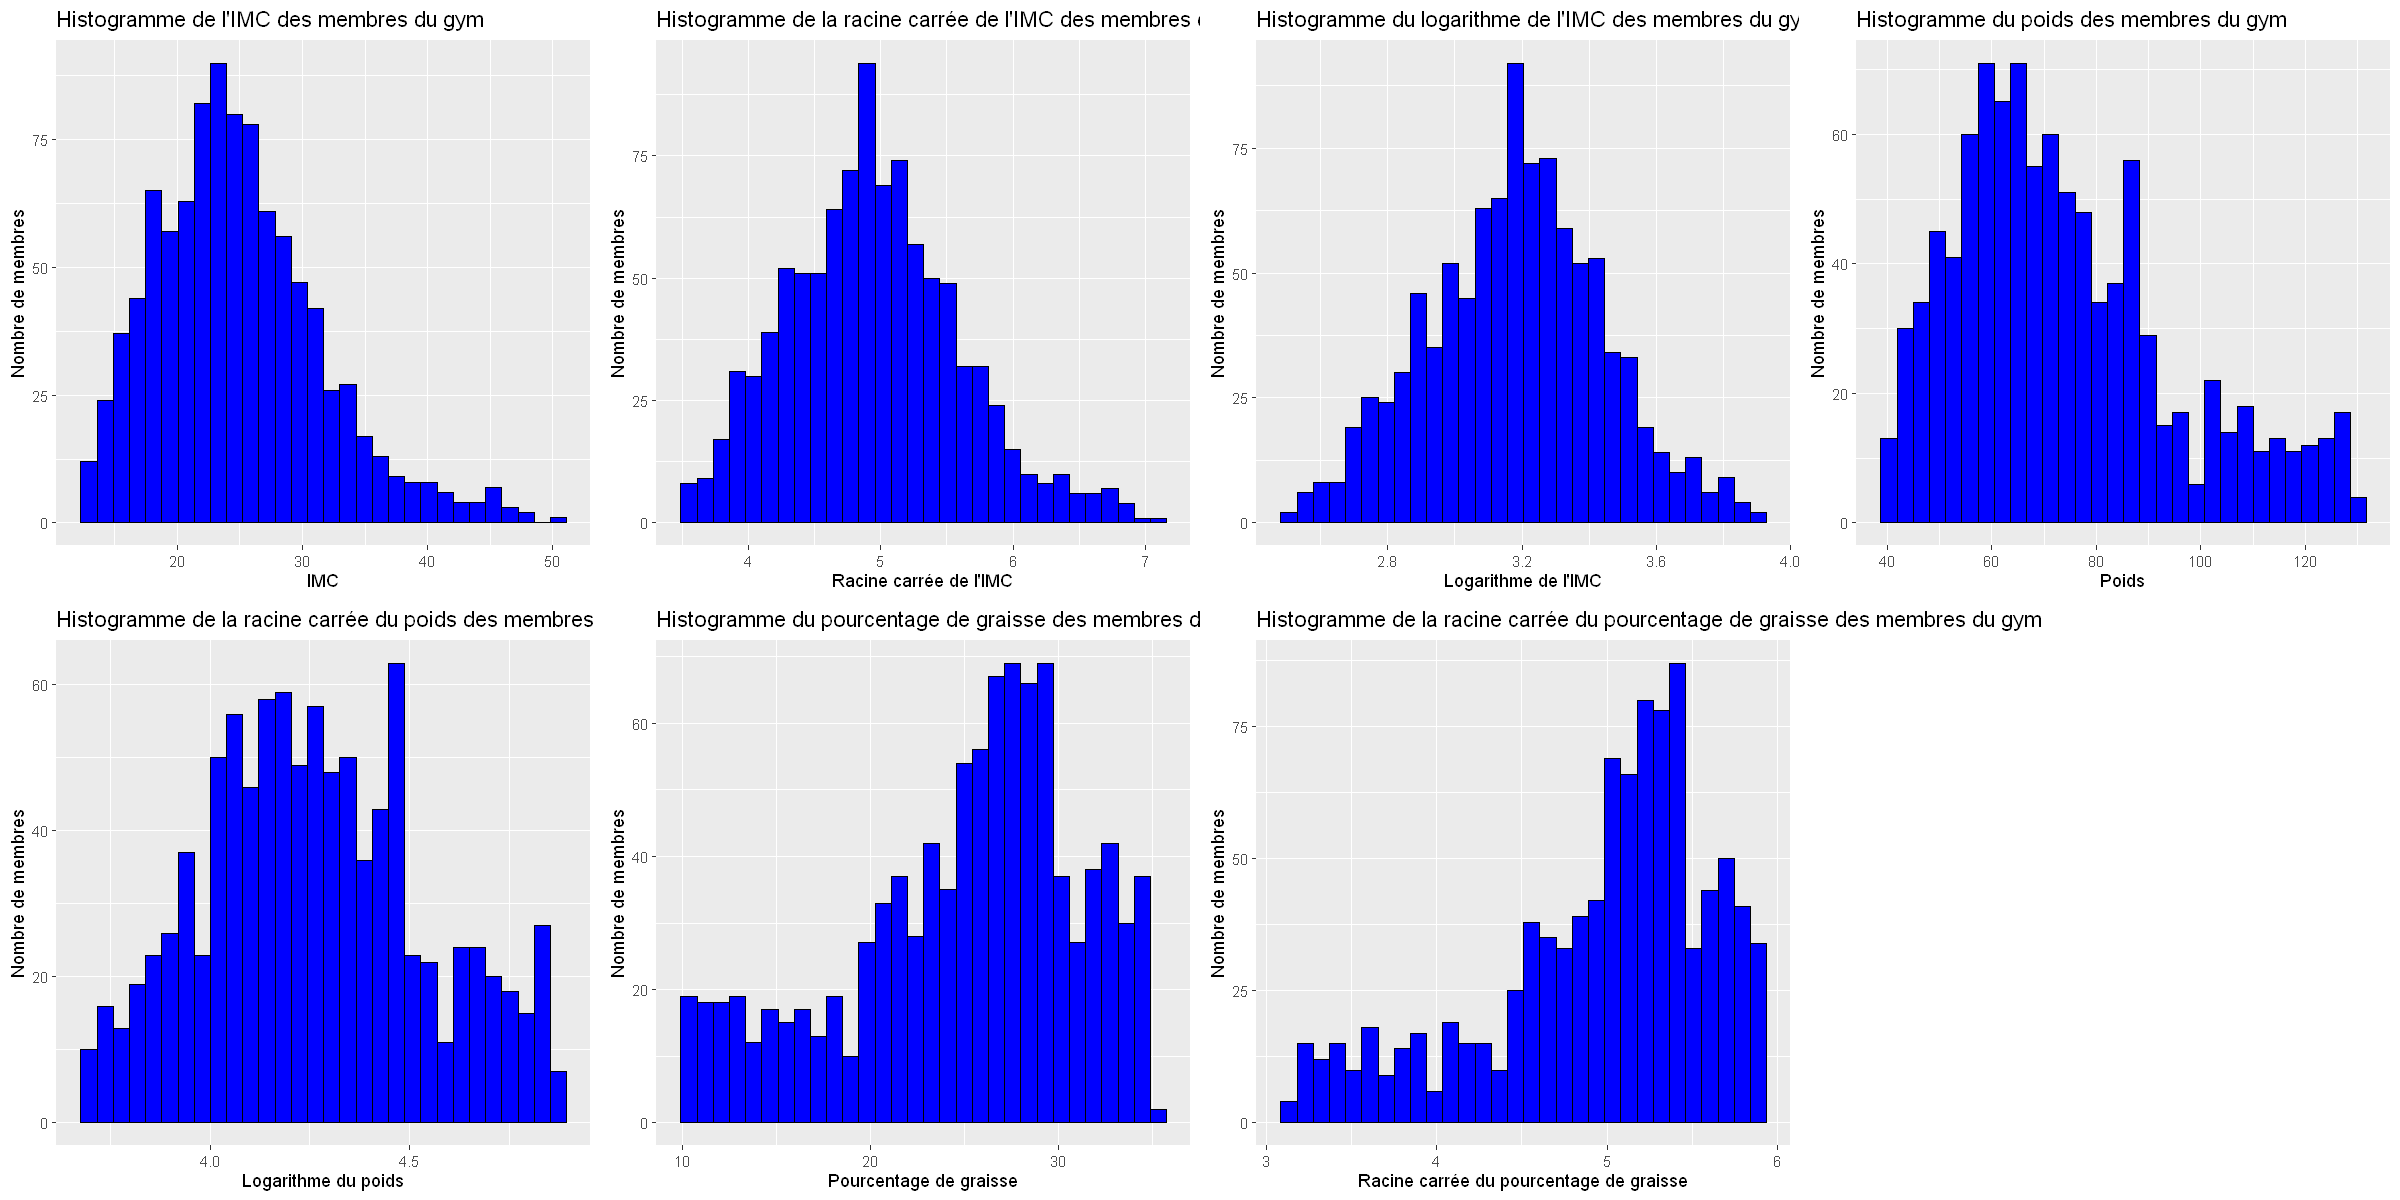

In [8]:
# Tracer les histogrammes de IMC Weight..kg. Fat_Percentage et les transformations
options(repr.plot.width=20, repr.plot.height=10)
g1 <- ggplot(gym, aes(BMI)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme de l'IMC des membres du gym", x = "IMC", y = "Nombre de membres")
g2 <- ggplot(gym, aes(SBMI)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme de la racine carrée de l'IMC des membres du gym", x = "Racine carrée de l'IMC", y = "Nombre de membres")
g3 <- ggplot(gym, aes(LBMI)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme du logarithme de l'IMC des membres du gym", x = "Logarithme de l'IMC", y = "Nombre de membres")
g4 <- ggplot(gym, aes(Weight..kg.)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme du poids des membres du gym", x = "Poids", y = "Nombre de membres")
g5 <- ggplot(gym, aes(LWeight)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme de la racine carrée du poids des membres du gym", x = "Logarithme du poids", y = "Nombre de membres")
g6 <- ggplot(gym, aes(Fat_Percentage)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme du pourcentage de graisse des membres du gym", x = "Pourcentage de graisse", y = "Nombre de membres")
g7 <- ggplot(gym, aes(SFat_Percentage)) + geom_histogram(fill = "blue", color = "black") + labs(title = "Histogramme de la racine carrée du pourcentage de graisse des membres du gym", x = "Racine carrée du pourcentage de graisse", y = "Nombre de membres")

grid.arrange(g1, g2, g3, g4, g5, g6, g7, ncol = 4)
rm(g1, g2, g3, g4, g5, g6, g7)


In [9]:
gym[, "Weight..kg."] <- log(gym[,"Weight..kg."])
gym[, "BMI"] <- log(gym[,"BMI"])

# renome les variables Weight..kg. et BMI en LWeight et LBMI
names(gym)[names(gym) == "Weight..kg."] <- "LWeight"
names(gym)[names(gym) == "BMI"] <- "LBMI"

# supprimer les colonnes 16 à 19 
gym <- gym[, -c(16:20)]

In [10]:
summary(gym)

      Age           Gender       LWeight        Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   :3.689   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.:4.062   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median :4.248   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   :4.263   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.:4.454   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :4.867   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0  
 Max

## Variables qualitatives

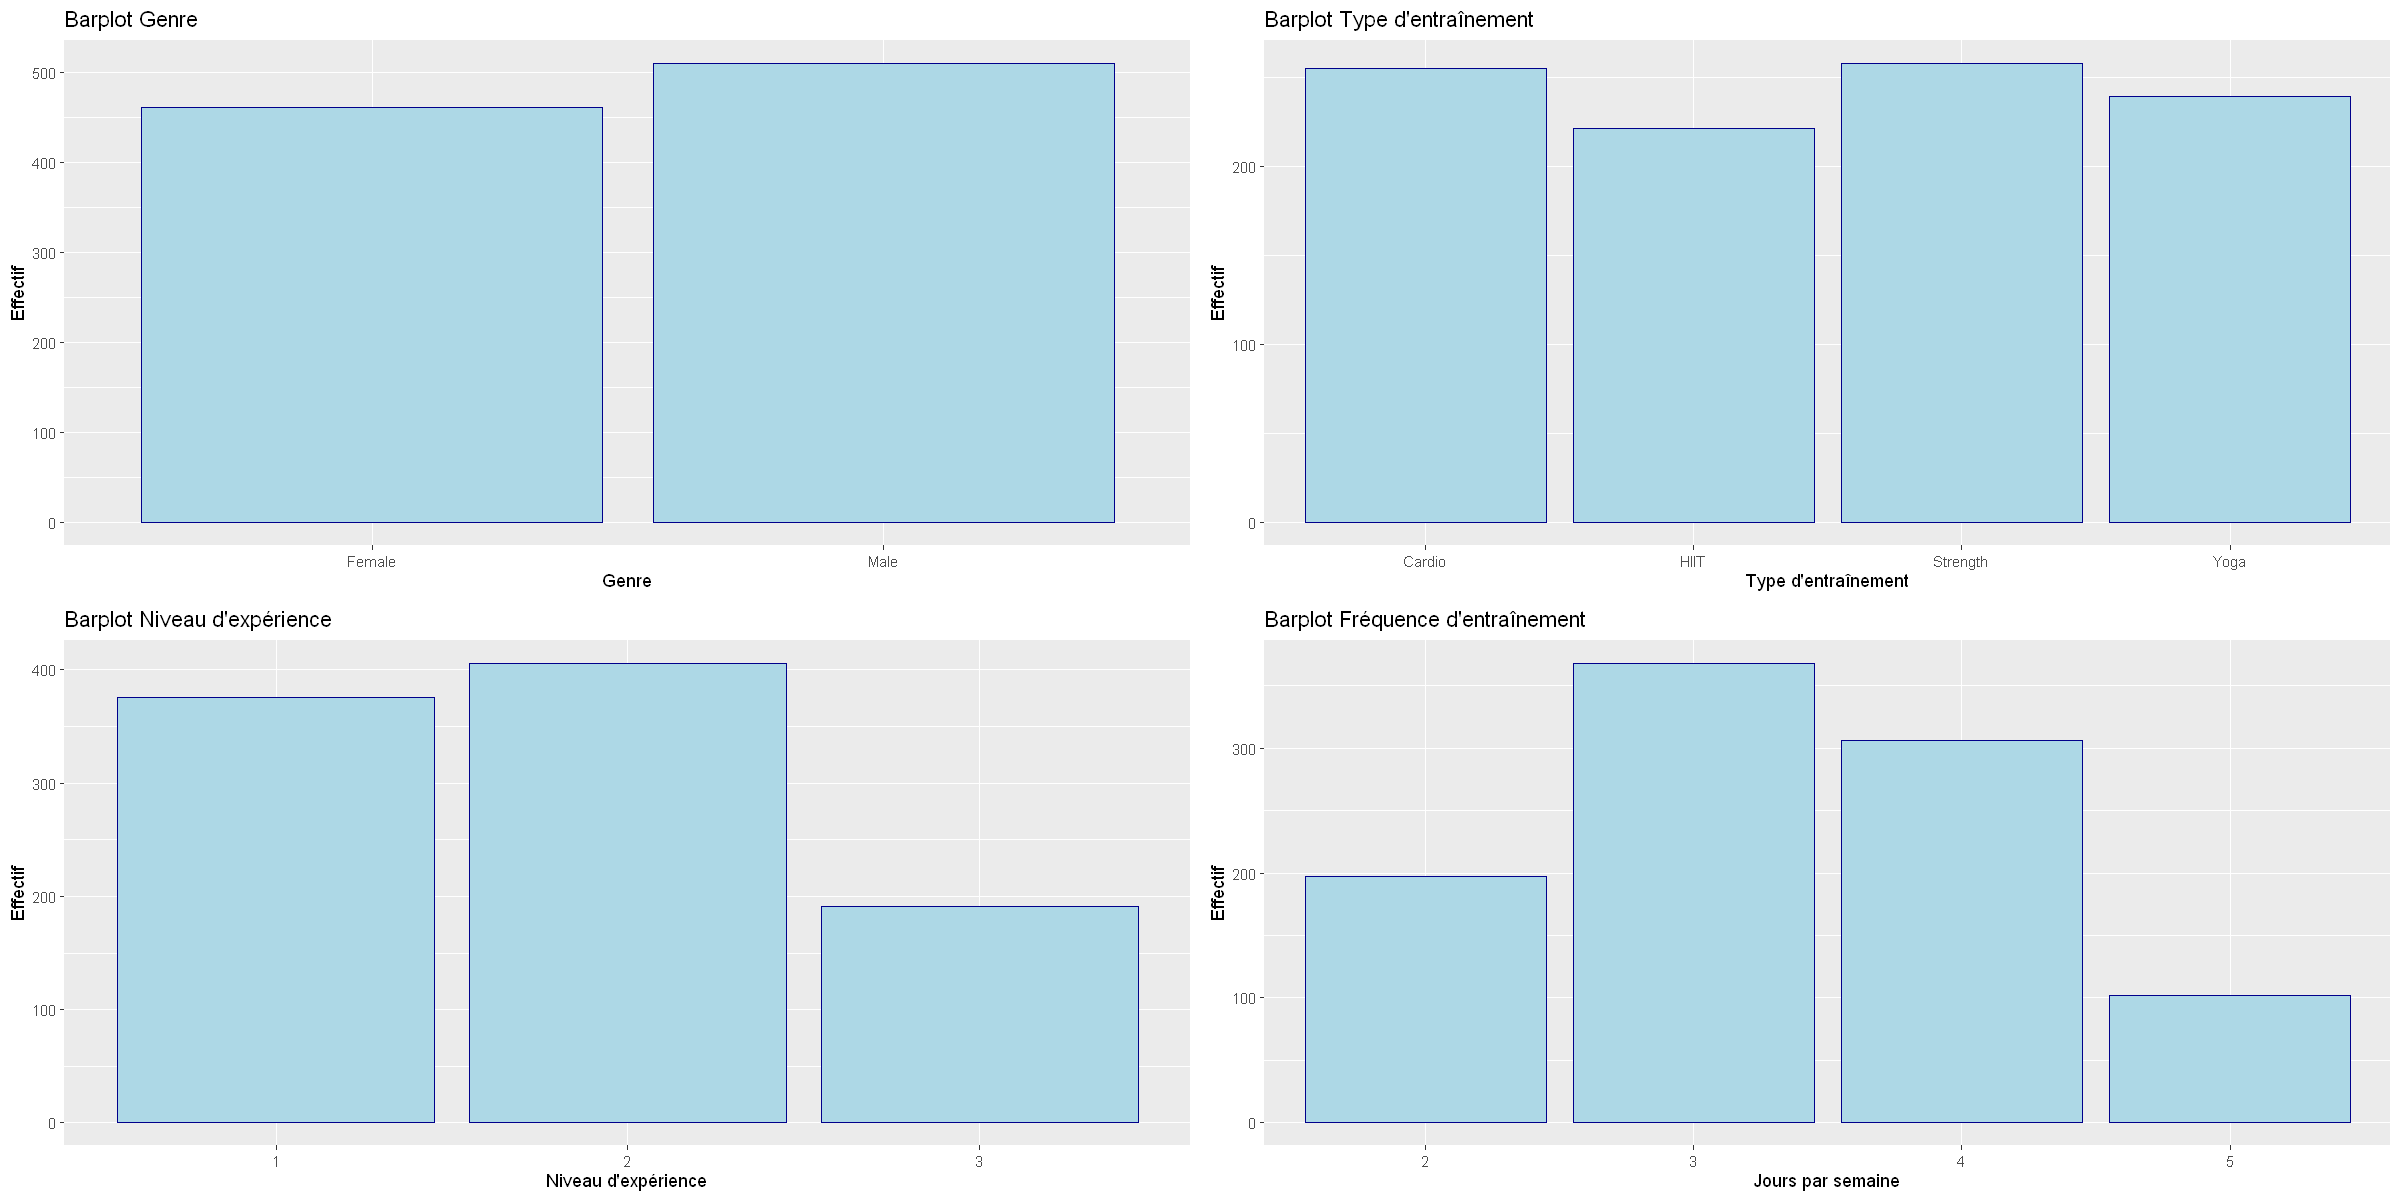

In [11]:
# Générer des barplots pour les variables qualitatives
q1 <- ggplot(gym, aes(x = Gender)) +
    geom_bar(fill = "lightblue", color = "darkblue") +
    labs(title = "Barplot Genre", x = "Genre", y = "Effectif")

q2 <- ggplot(gym, aes(x = Workout_Type)) +
    geom_bar(fill = "lightblue", color = "darkblue") +
    labs(title = "Barplot Type d'entraînement", x = "Type d'entraînement", y = "Effectif")

q3 <- ggplot(gym, aes(x = Experience_Level)) +
    geom_bar(fill = "lightblue", color = "darkblue") +
    labs(title = "Barplot Niveau d'expérience", x = "Niveau d'expérience", y = "Effectif")

q4 <- ggplot(gym, aes(x = Workout_Frequency..days.week.)) +
    geom_bar(fill = "lightblue", color = "darkblue") +
    labs(title = "Barplot Fréquence d'entraînement", x = "Jours par semaine", y = "Effectif")

grid.arrange(q1, q2, q3, q4, ncol = 2)

rm(q1, q2, q3, q4)


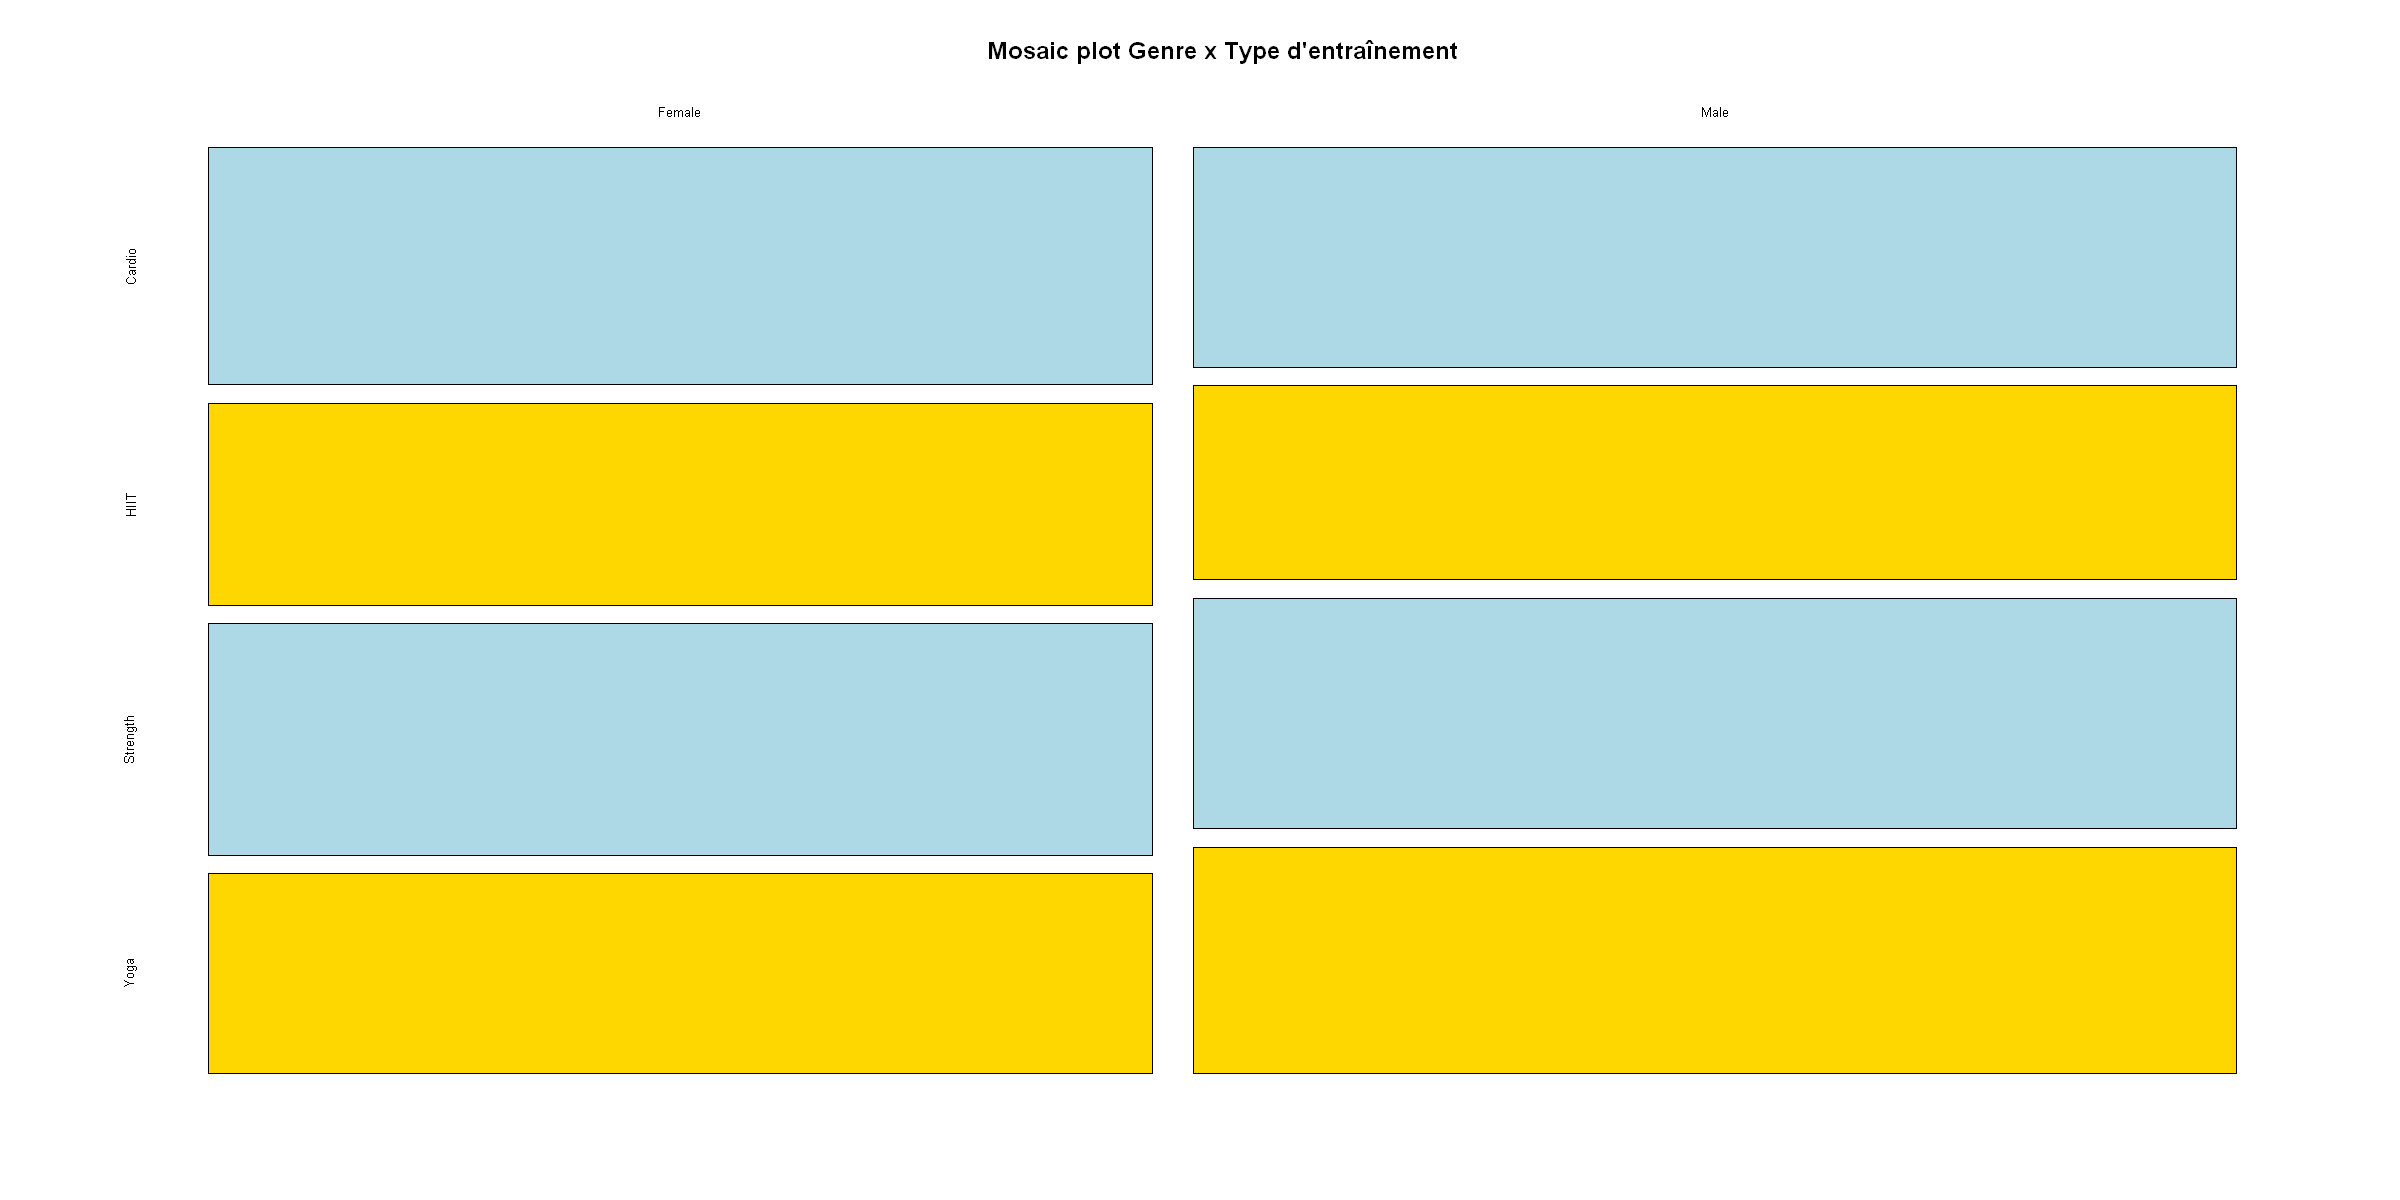

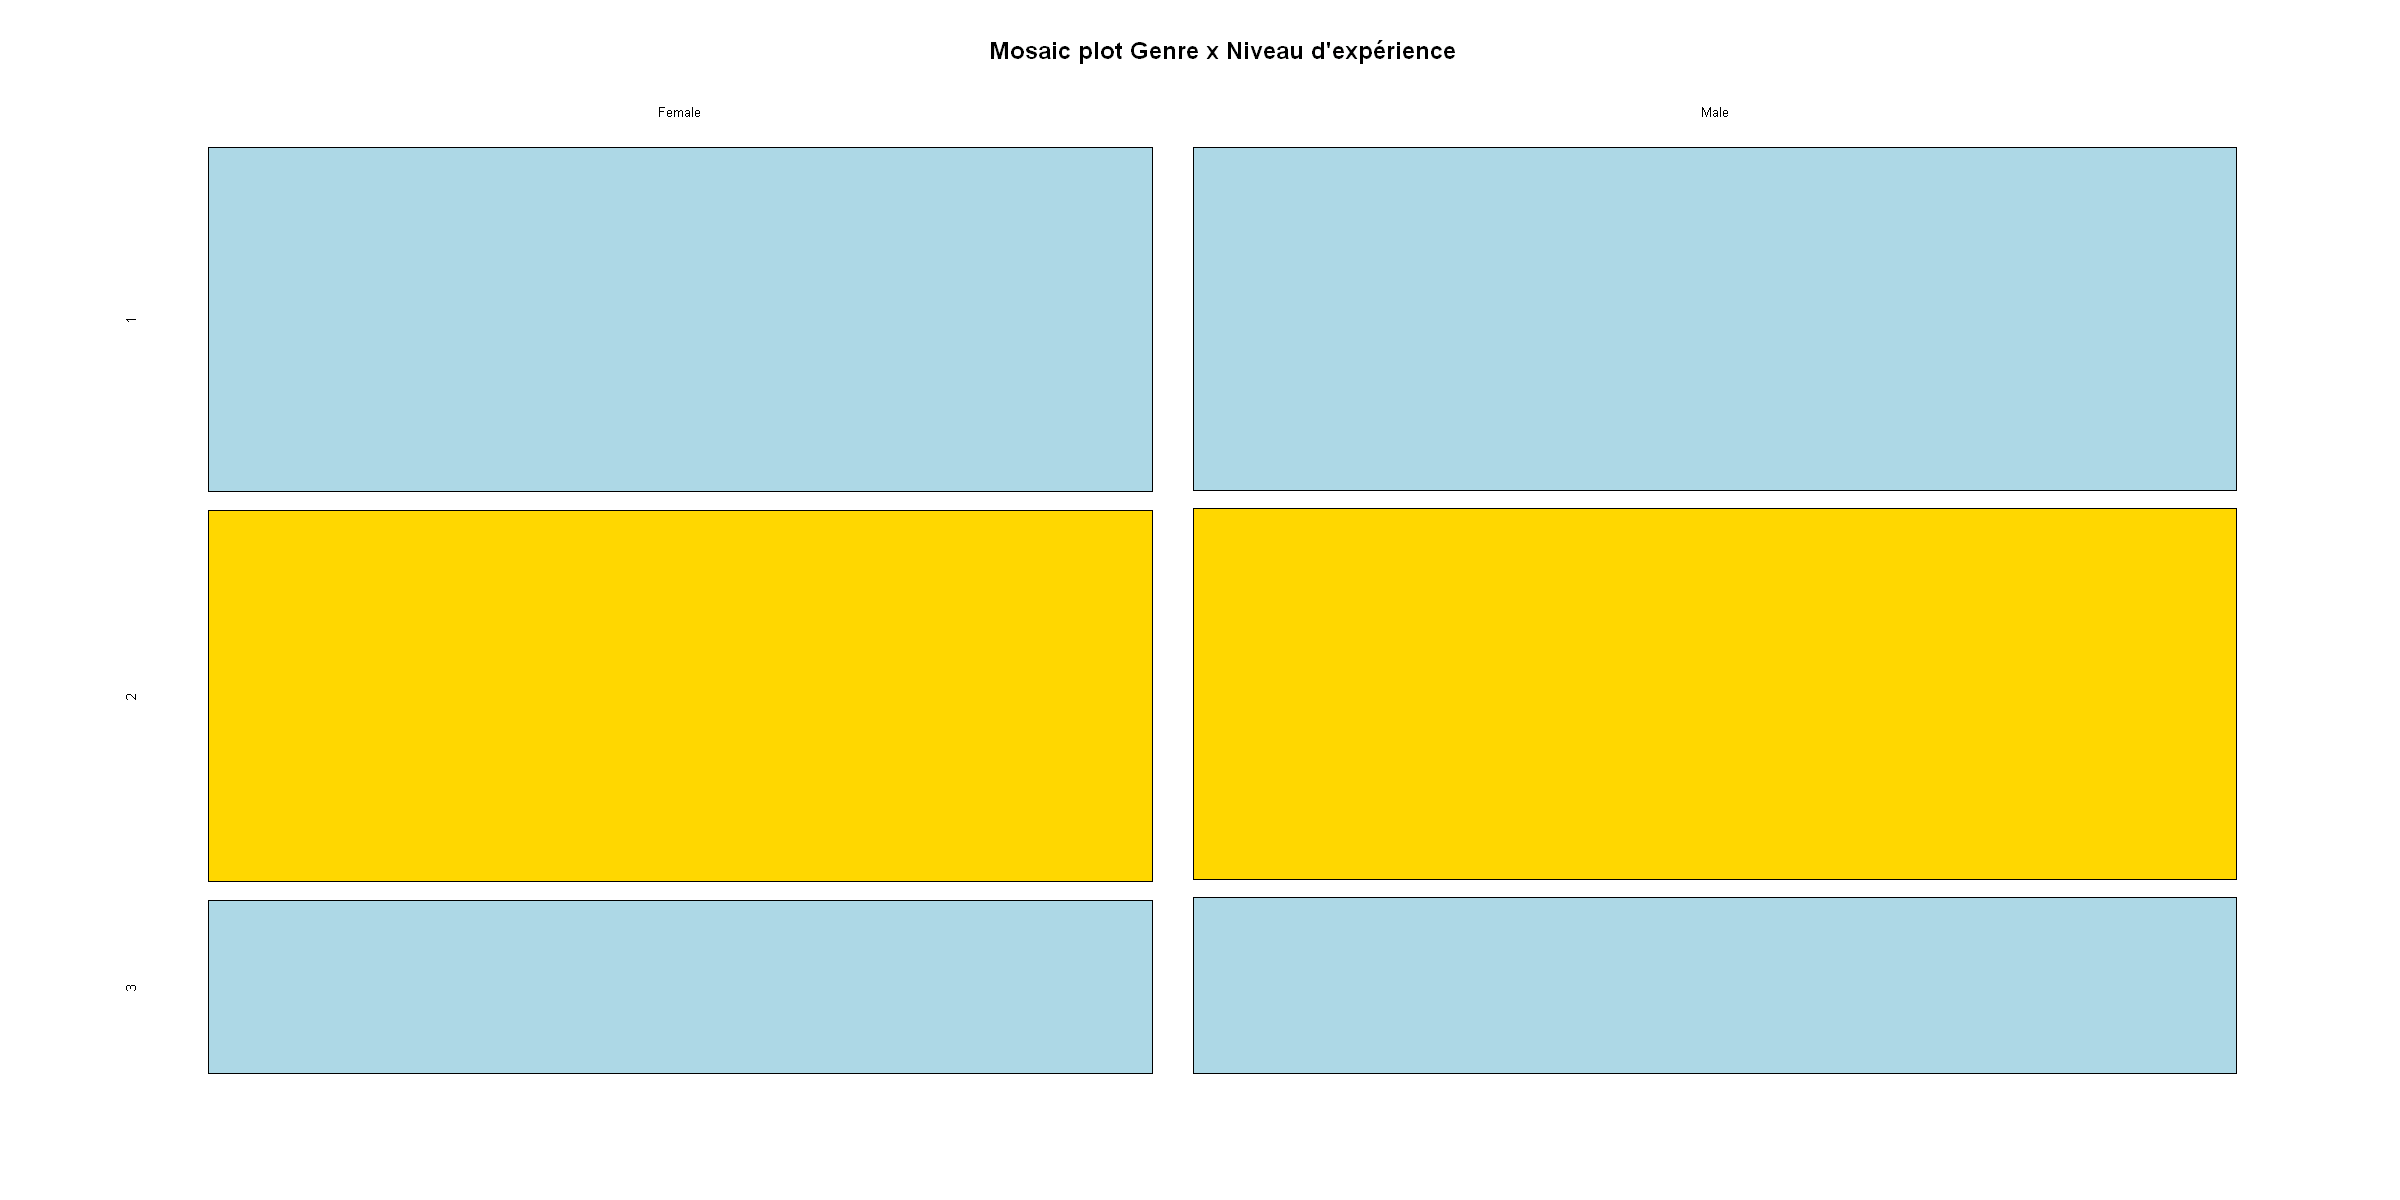

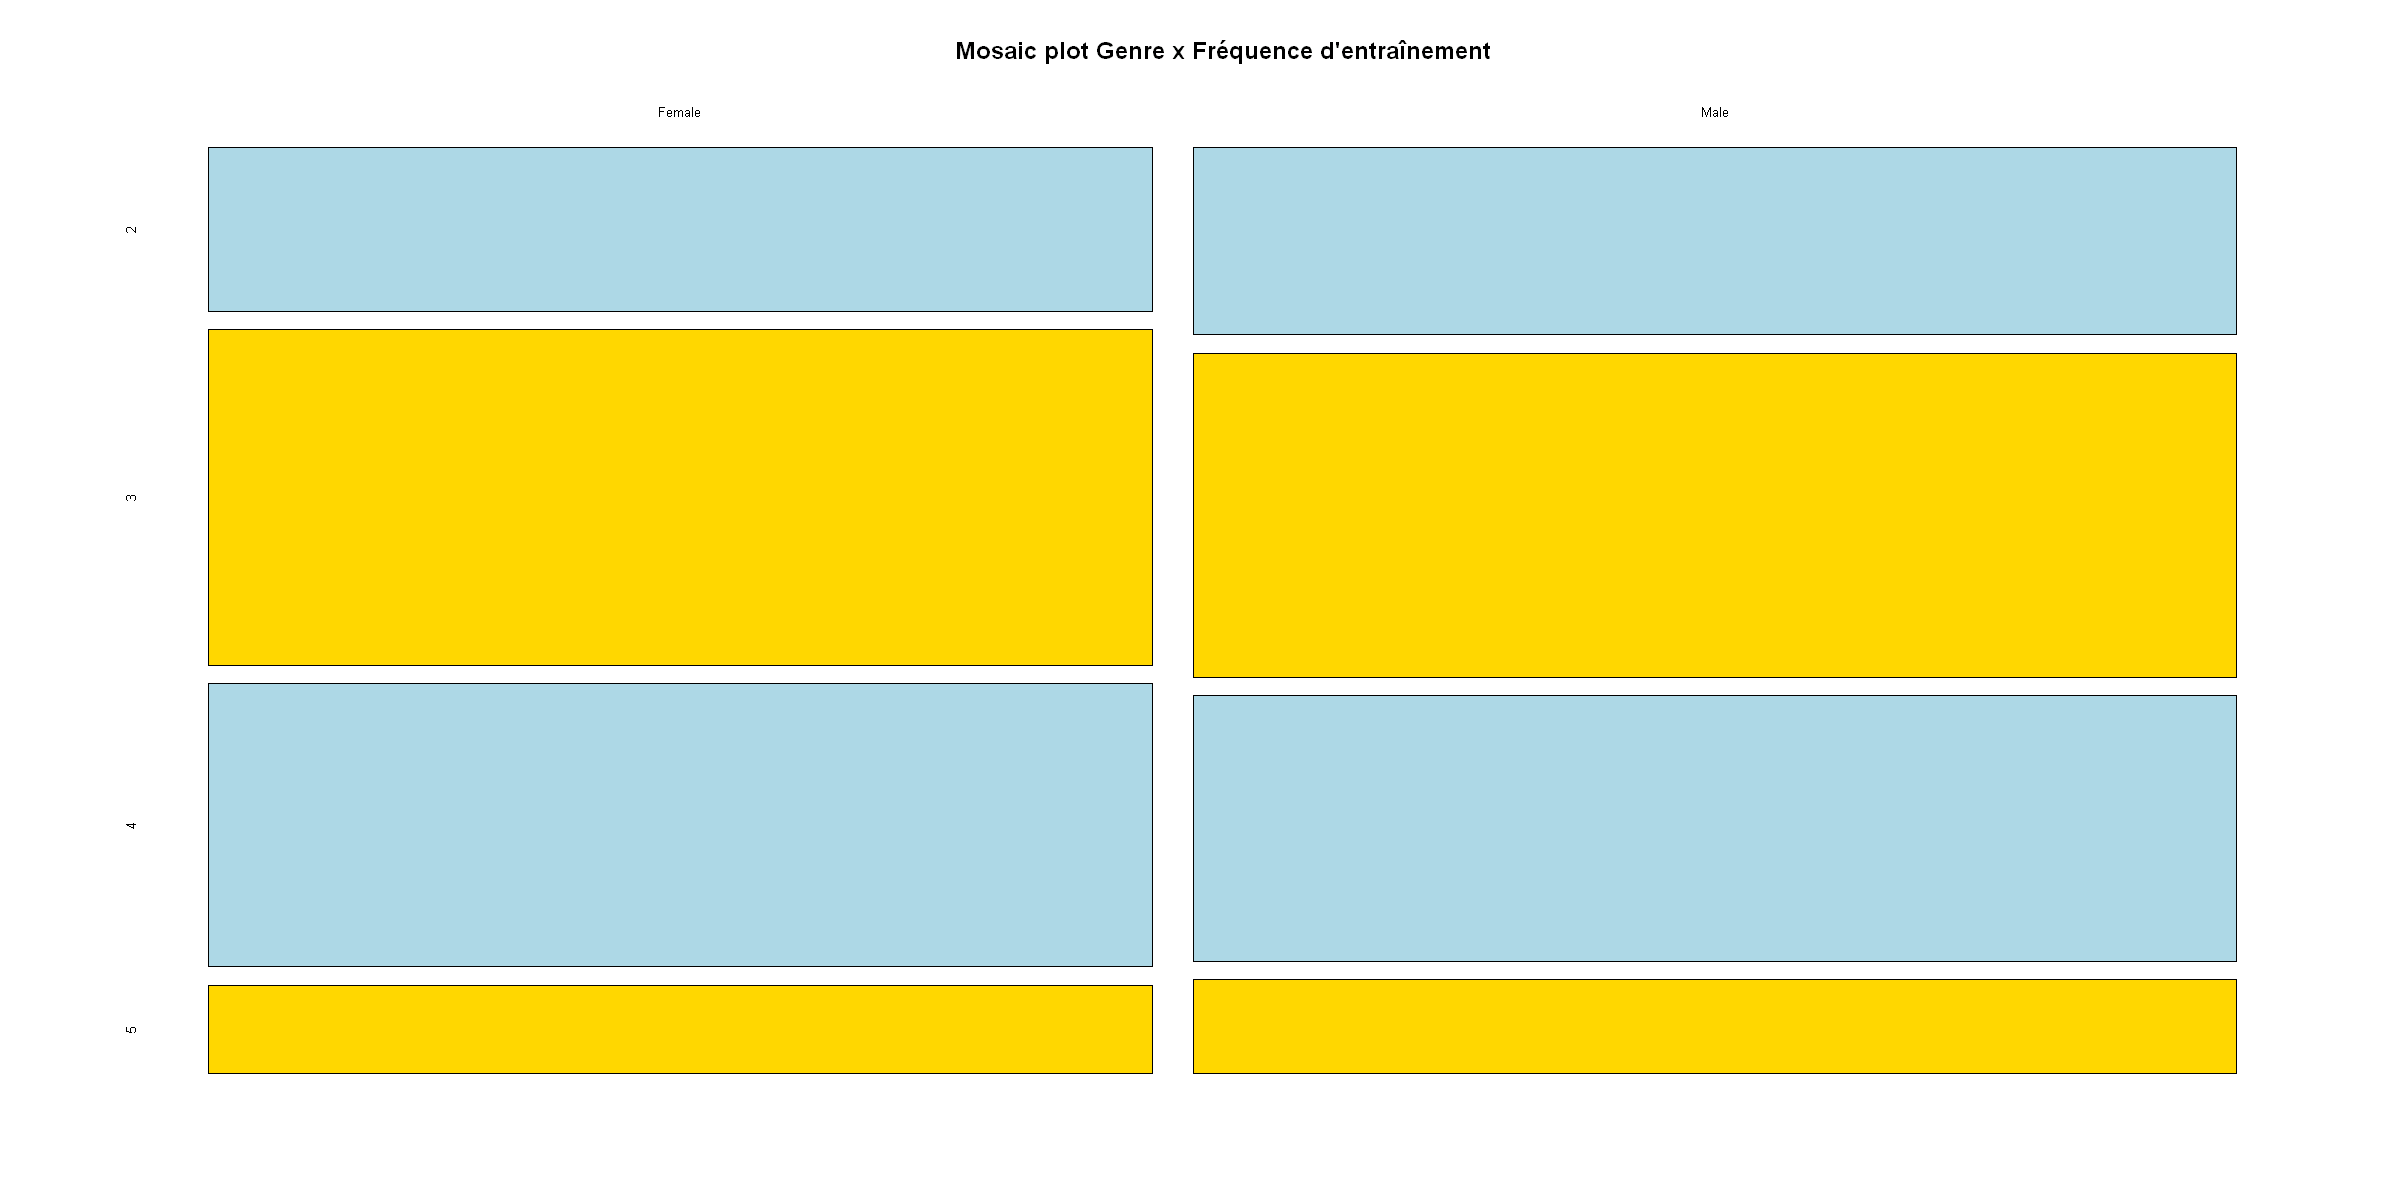

In [12]:
# Générer des mosaic plot pour les variables qualitatives

mosaicplot(table(gym$Gender, gym$Workout_Type), main = "Mosaic plot Genre x Type d'entraînement", color = c("lightblue", "gold"))
mosaicplot(table(gym$Gender, gym$Experience_Level), main = "Mosaic plot Genre x Niveau d'expérience", color = c("lightblue", "gold"))
mosaicplot(table(gym$Gender, gym$Workout_Frequency..days.week.), main = "Mosaic plot Genre x Fréquence d'entraînement", color = c("lightblue", "gold"))


In [13]:
# selectionner les variables quantitatives
gym_quanti = gym %>% select (Age, LWeight, Height..m., Max_BPM, Avg_BPM, Resting_BPM, Session_Duration..hours., Calories_Burned, Fat_Percentage, Water_Intake..liters., LBMI)

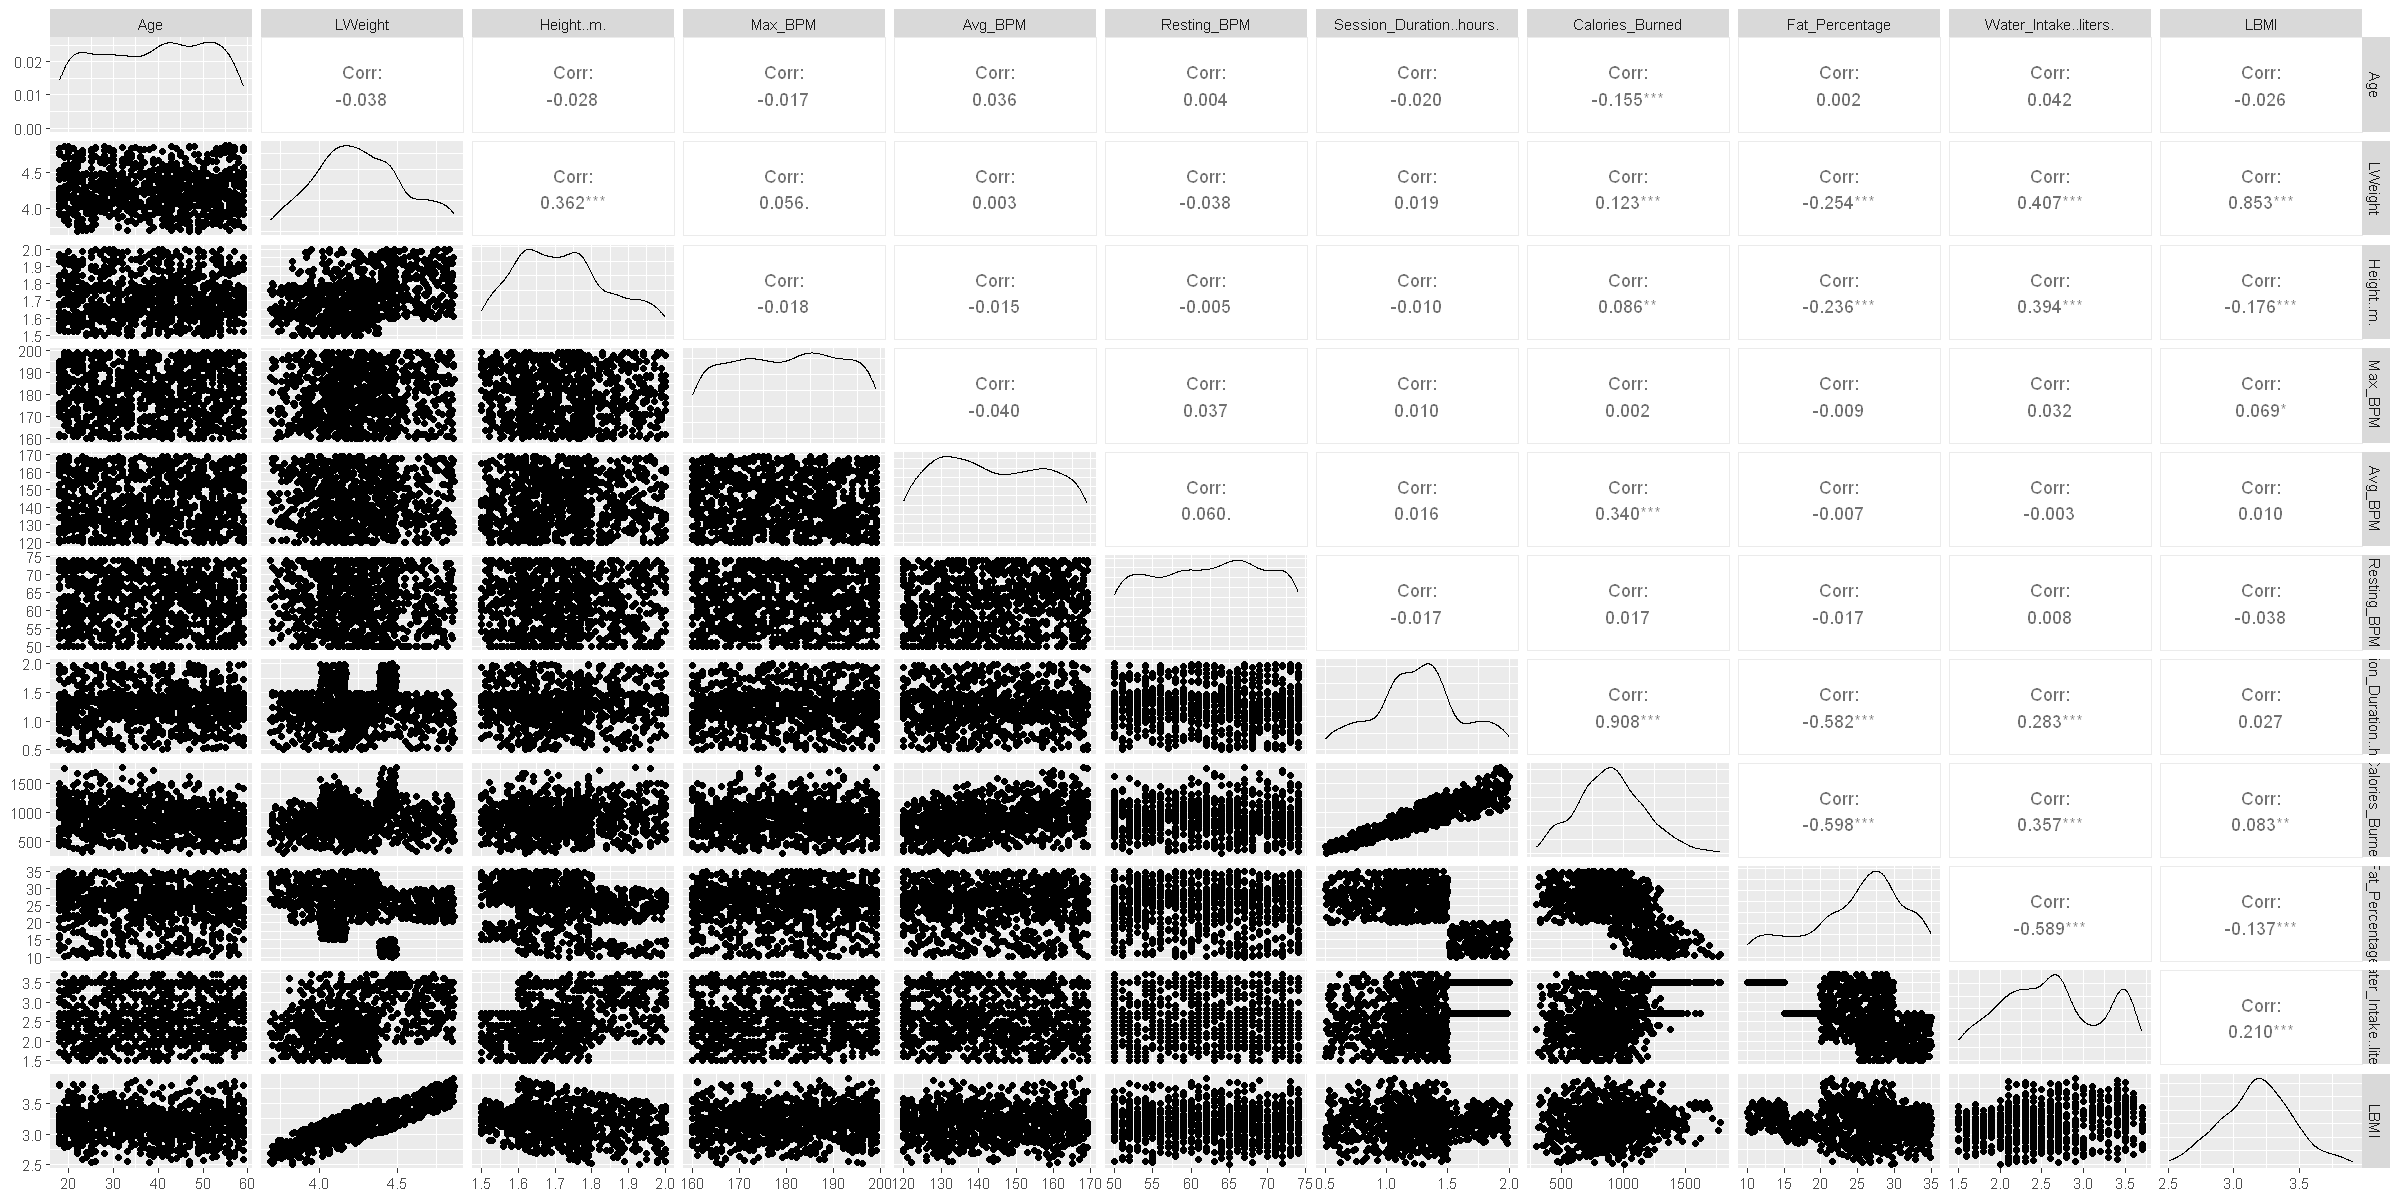

In [14]:
# ggpairs(gym_quanti)

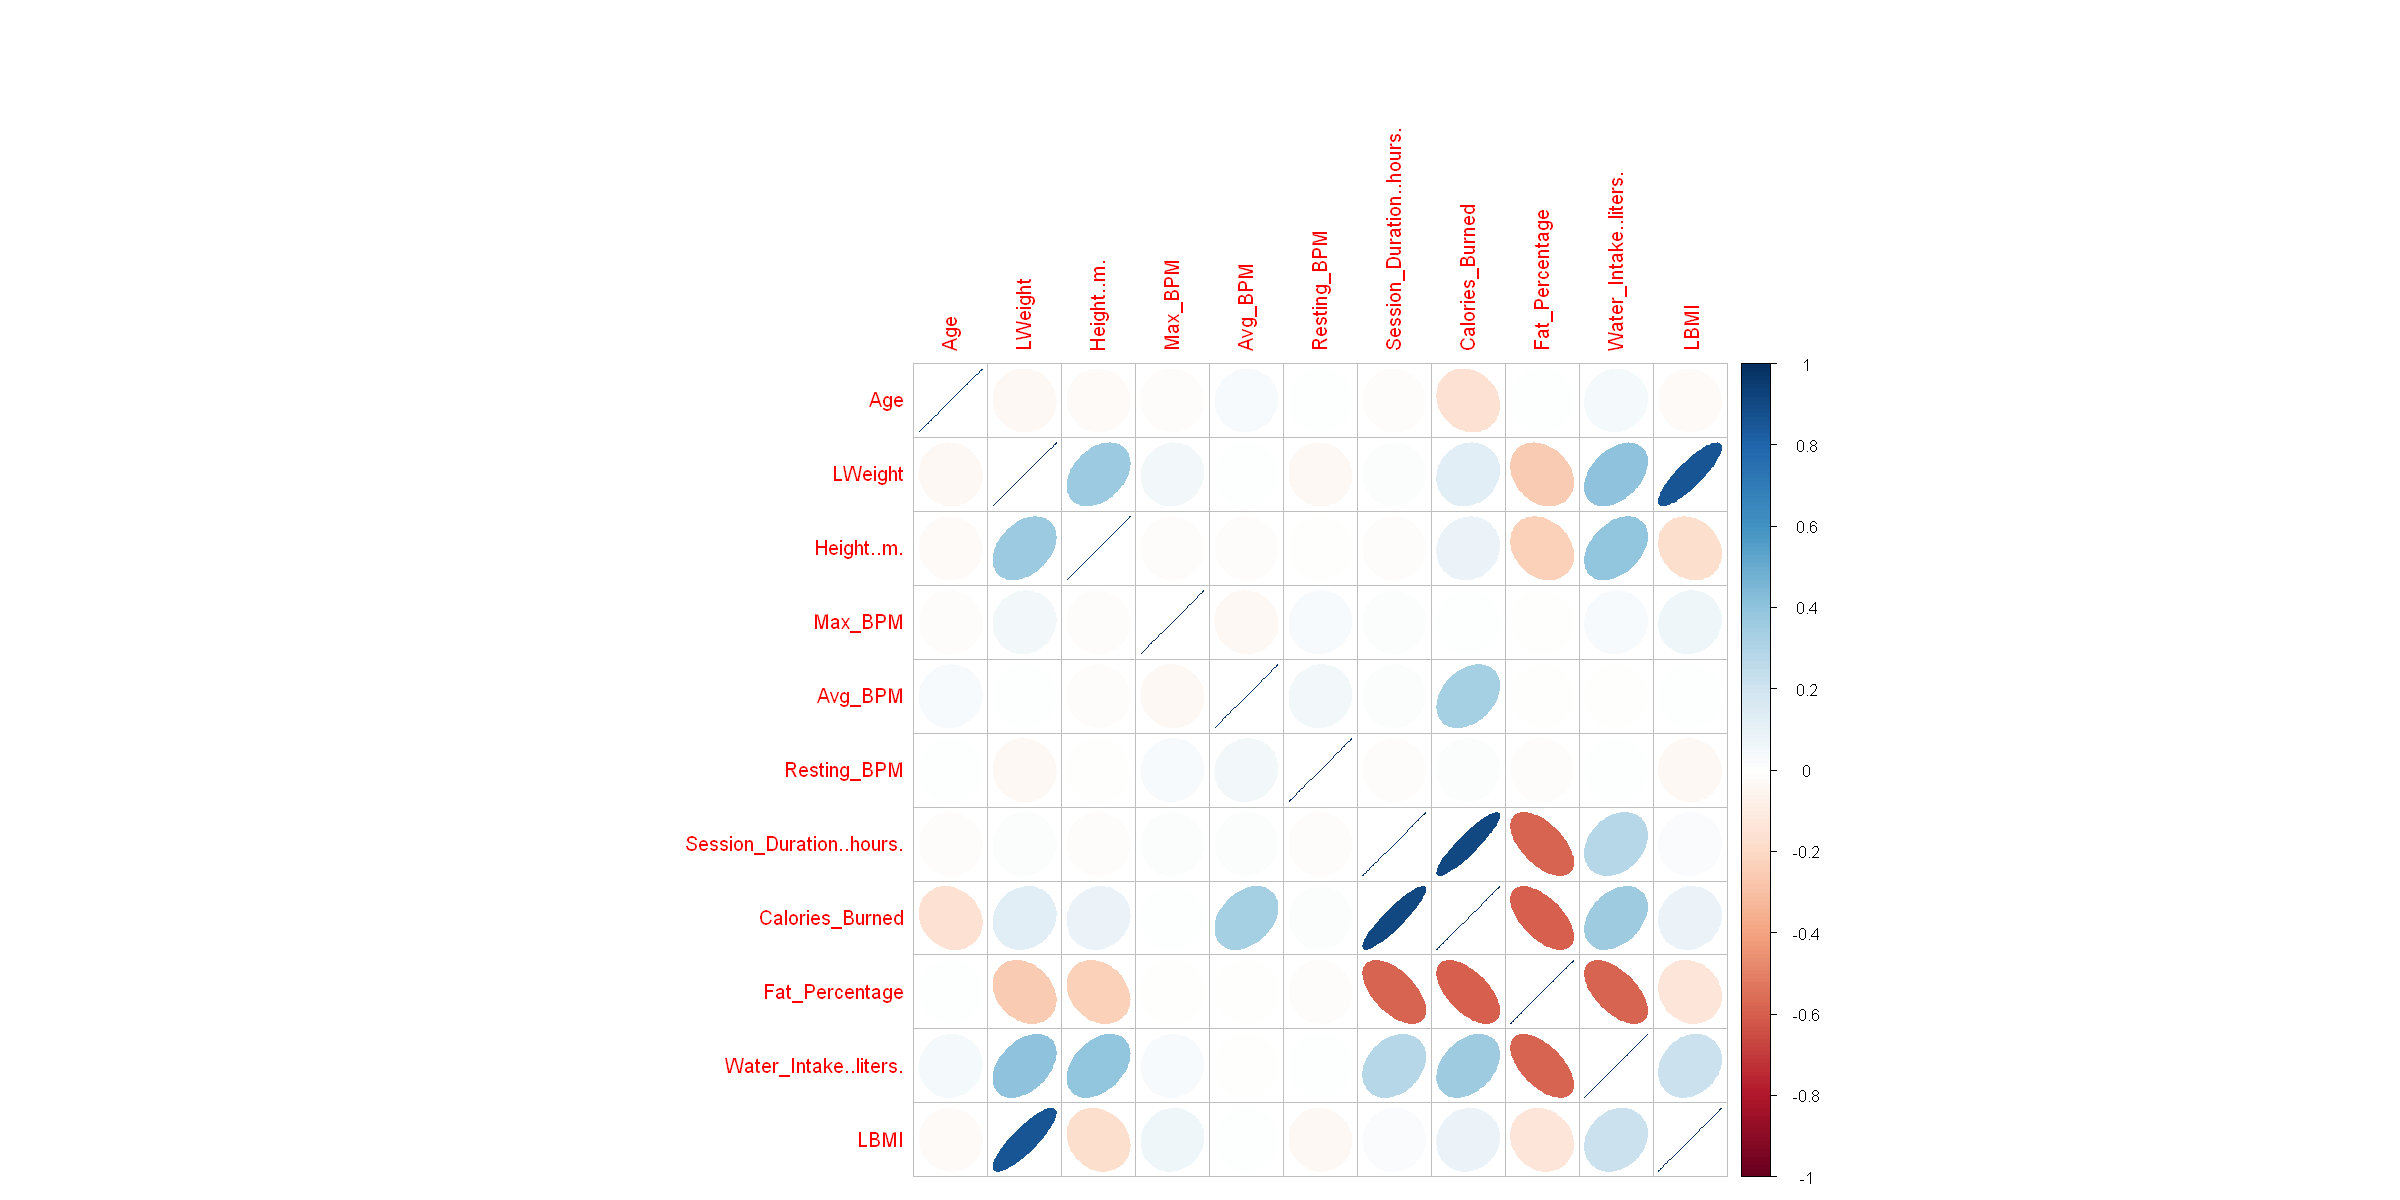

In [15]:
corrplot(cor(gym_quanti), method = "ellipse")

## ACP

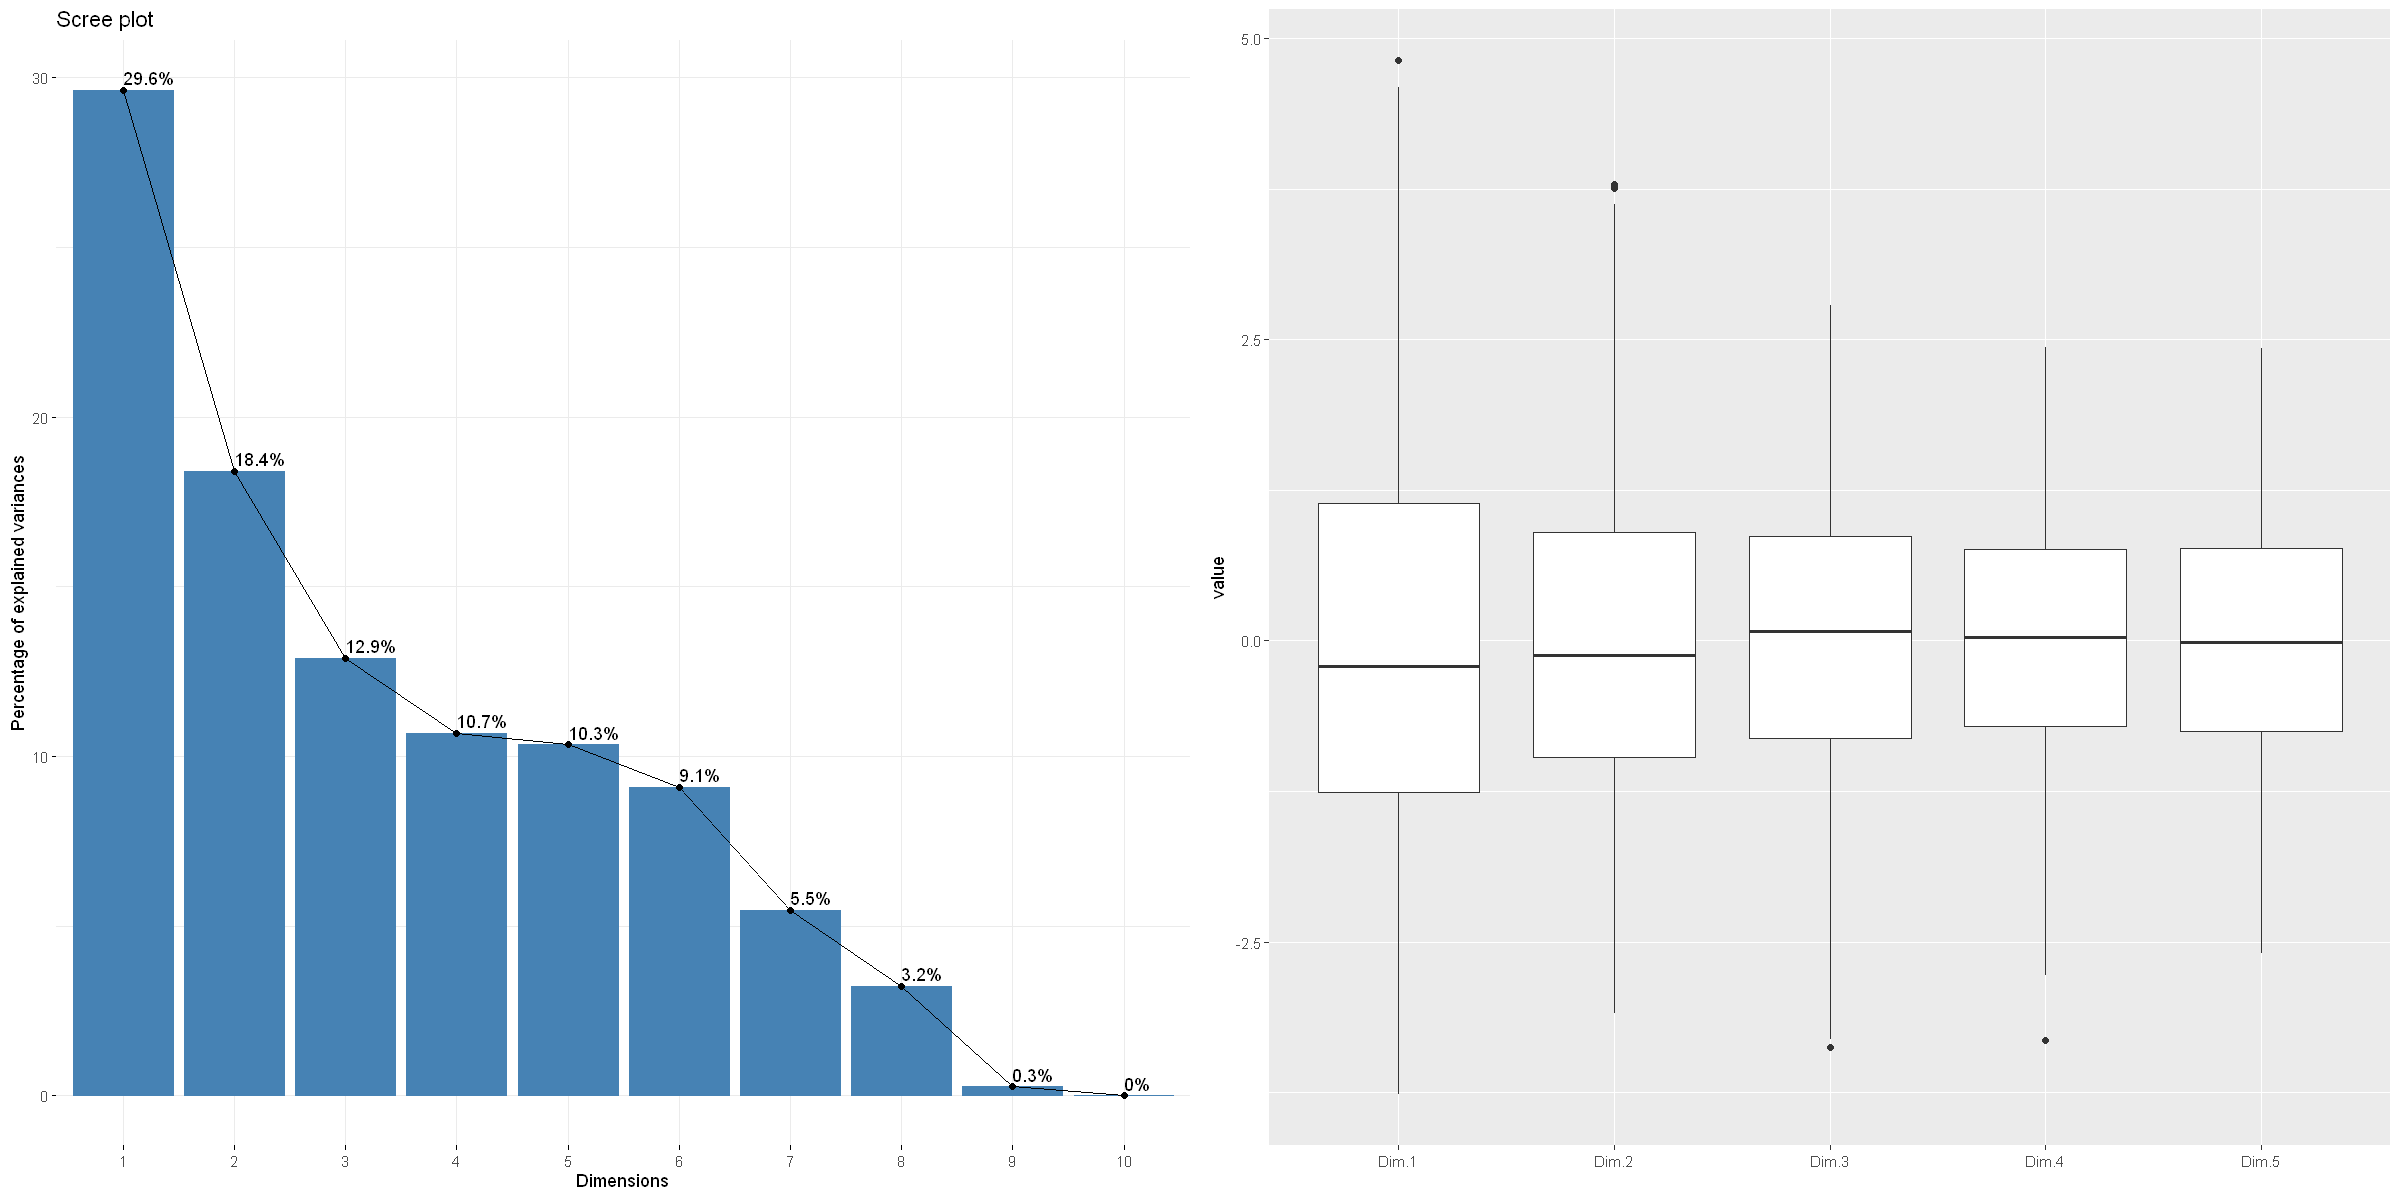

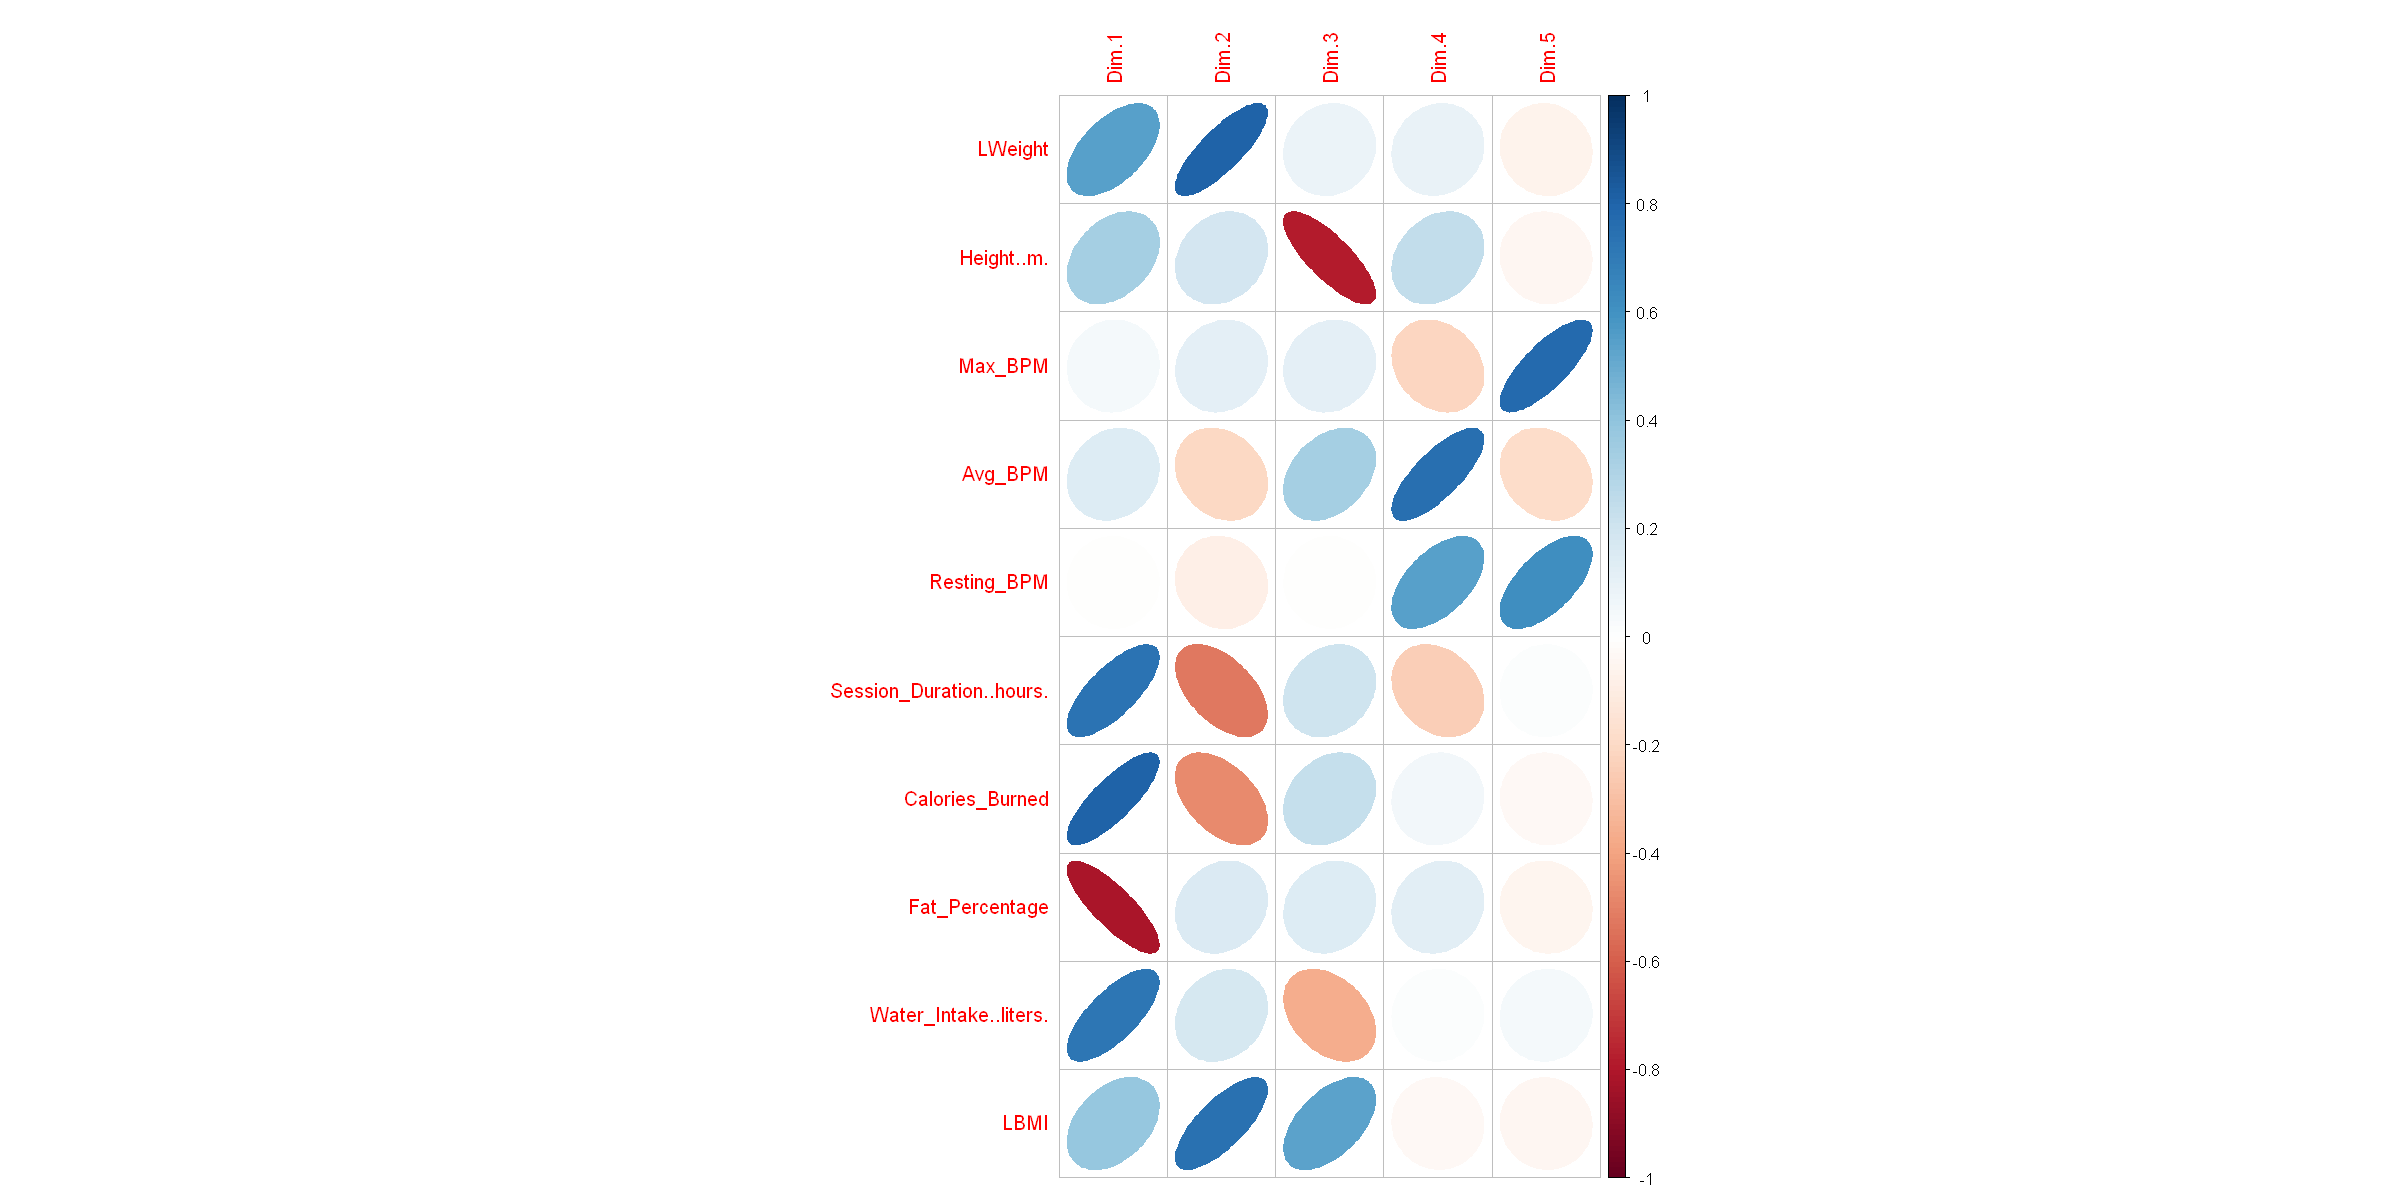

In [ ]:
# acp <- PCA(gym[, c(1, 3:9, 11:12, 15)], scale.unit = TRUE, graph = FALSE, quali.sup = 2, quanti.sup = 1, ncp = 5)

acp <- PCA(gym, scale.unit = TRUE, graph = FALSE, quali.sup = c(2, 10, 13, 14) , quanti.sup = 1, ncp = )

# ACP réduite

# Décroissance des valeurs propres
library(factoextra)
g1<-fviz_eig(acp, addlabels = TRUE)
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

library(corrplot)
corrplot(acp$var$cor, is.corr=TRUE,method="ellipse")

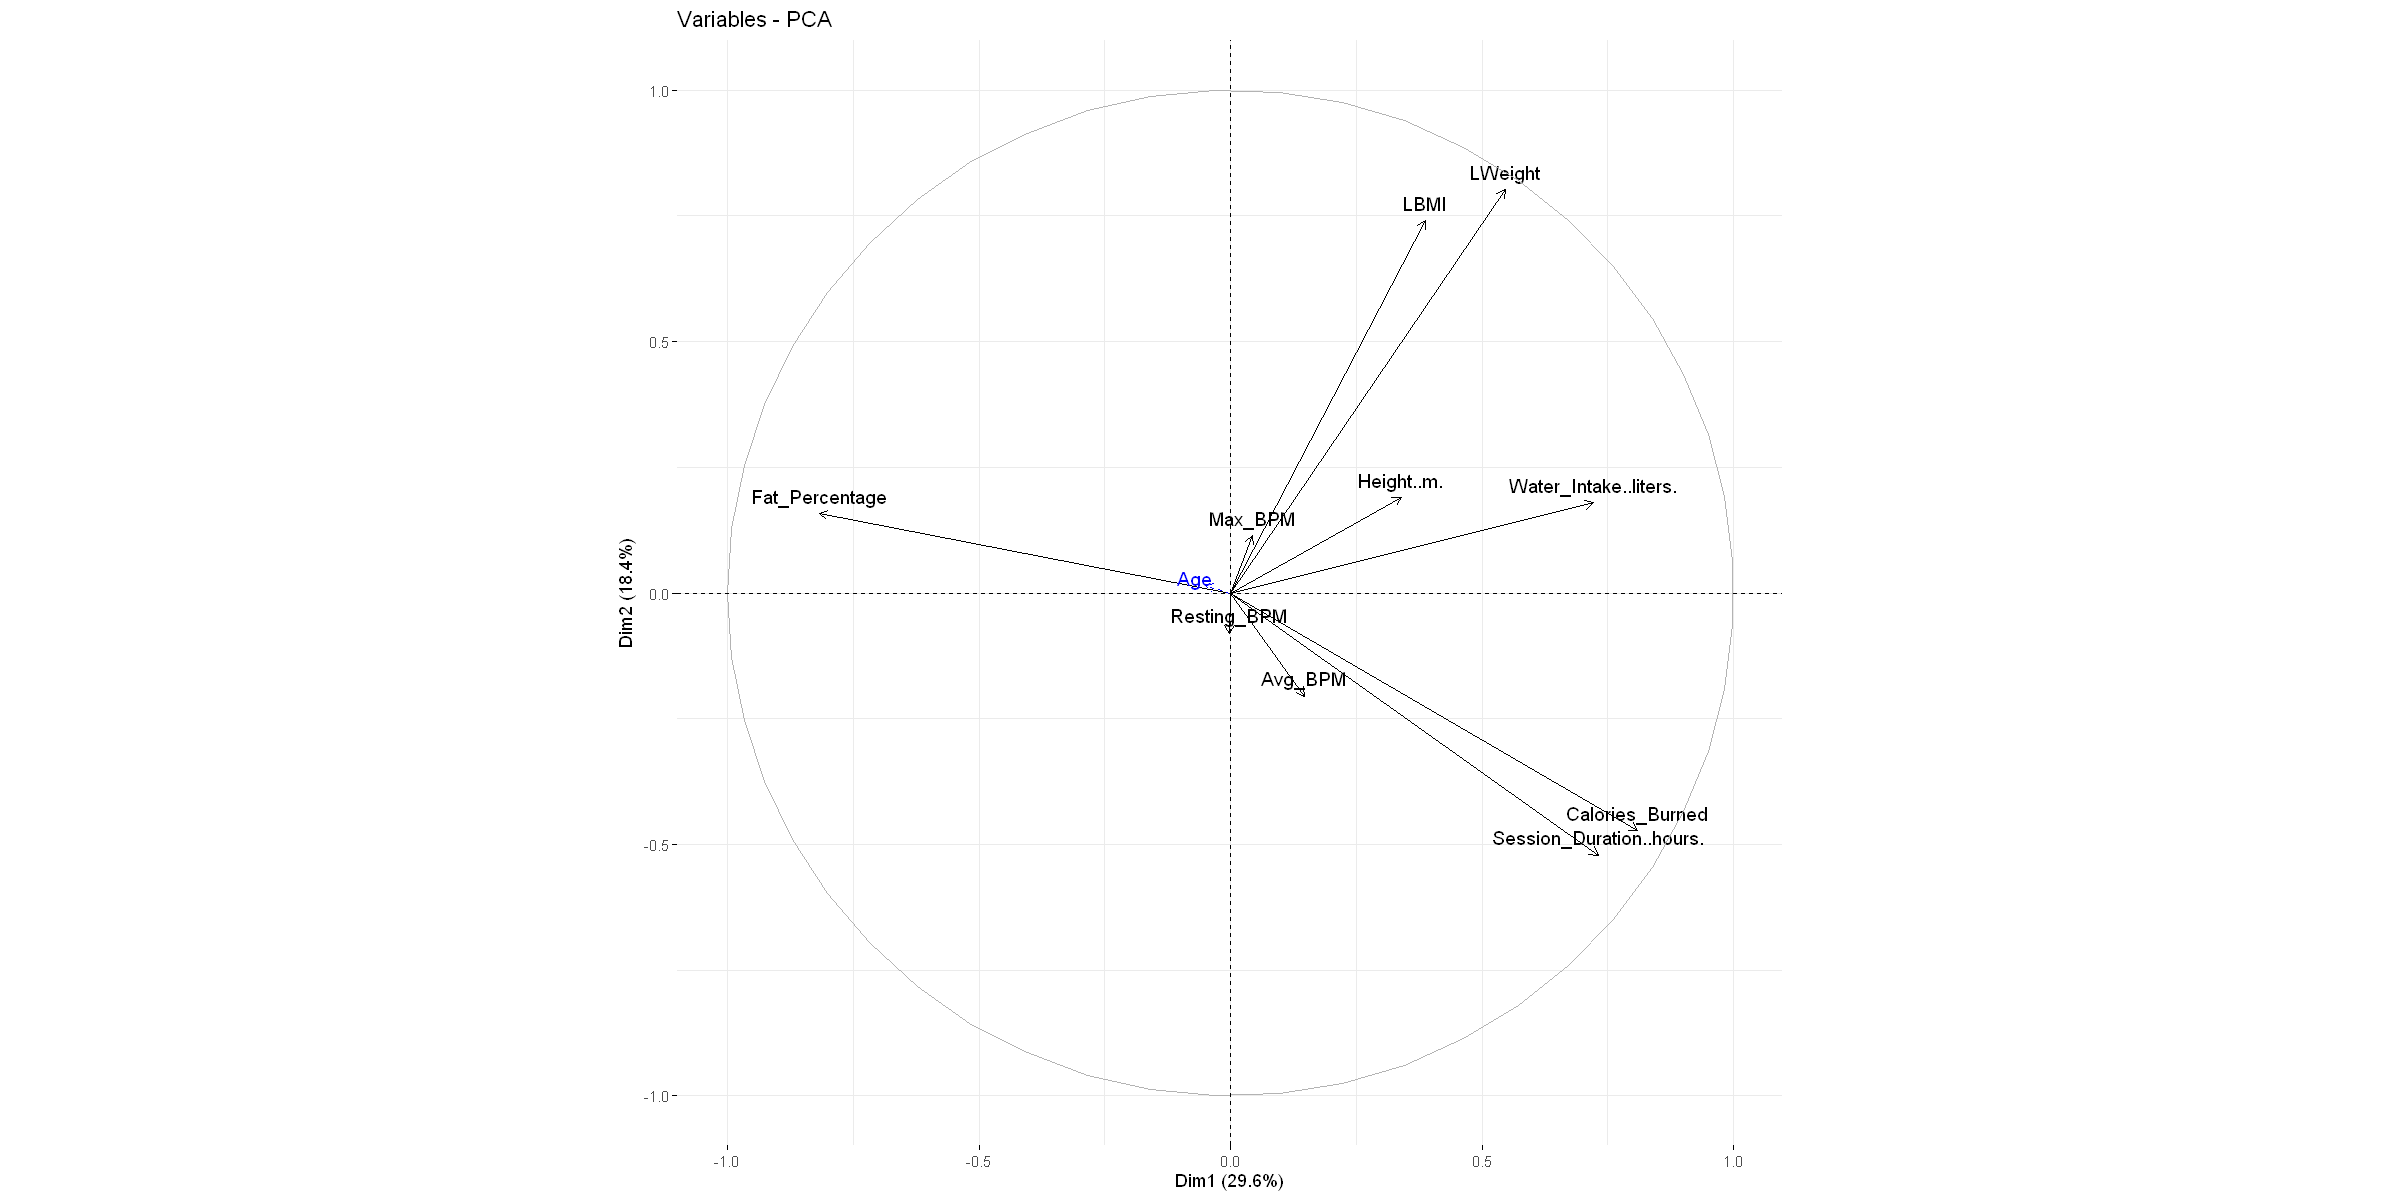

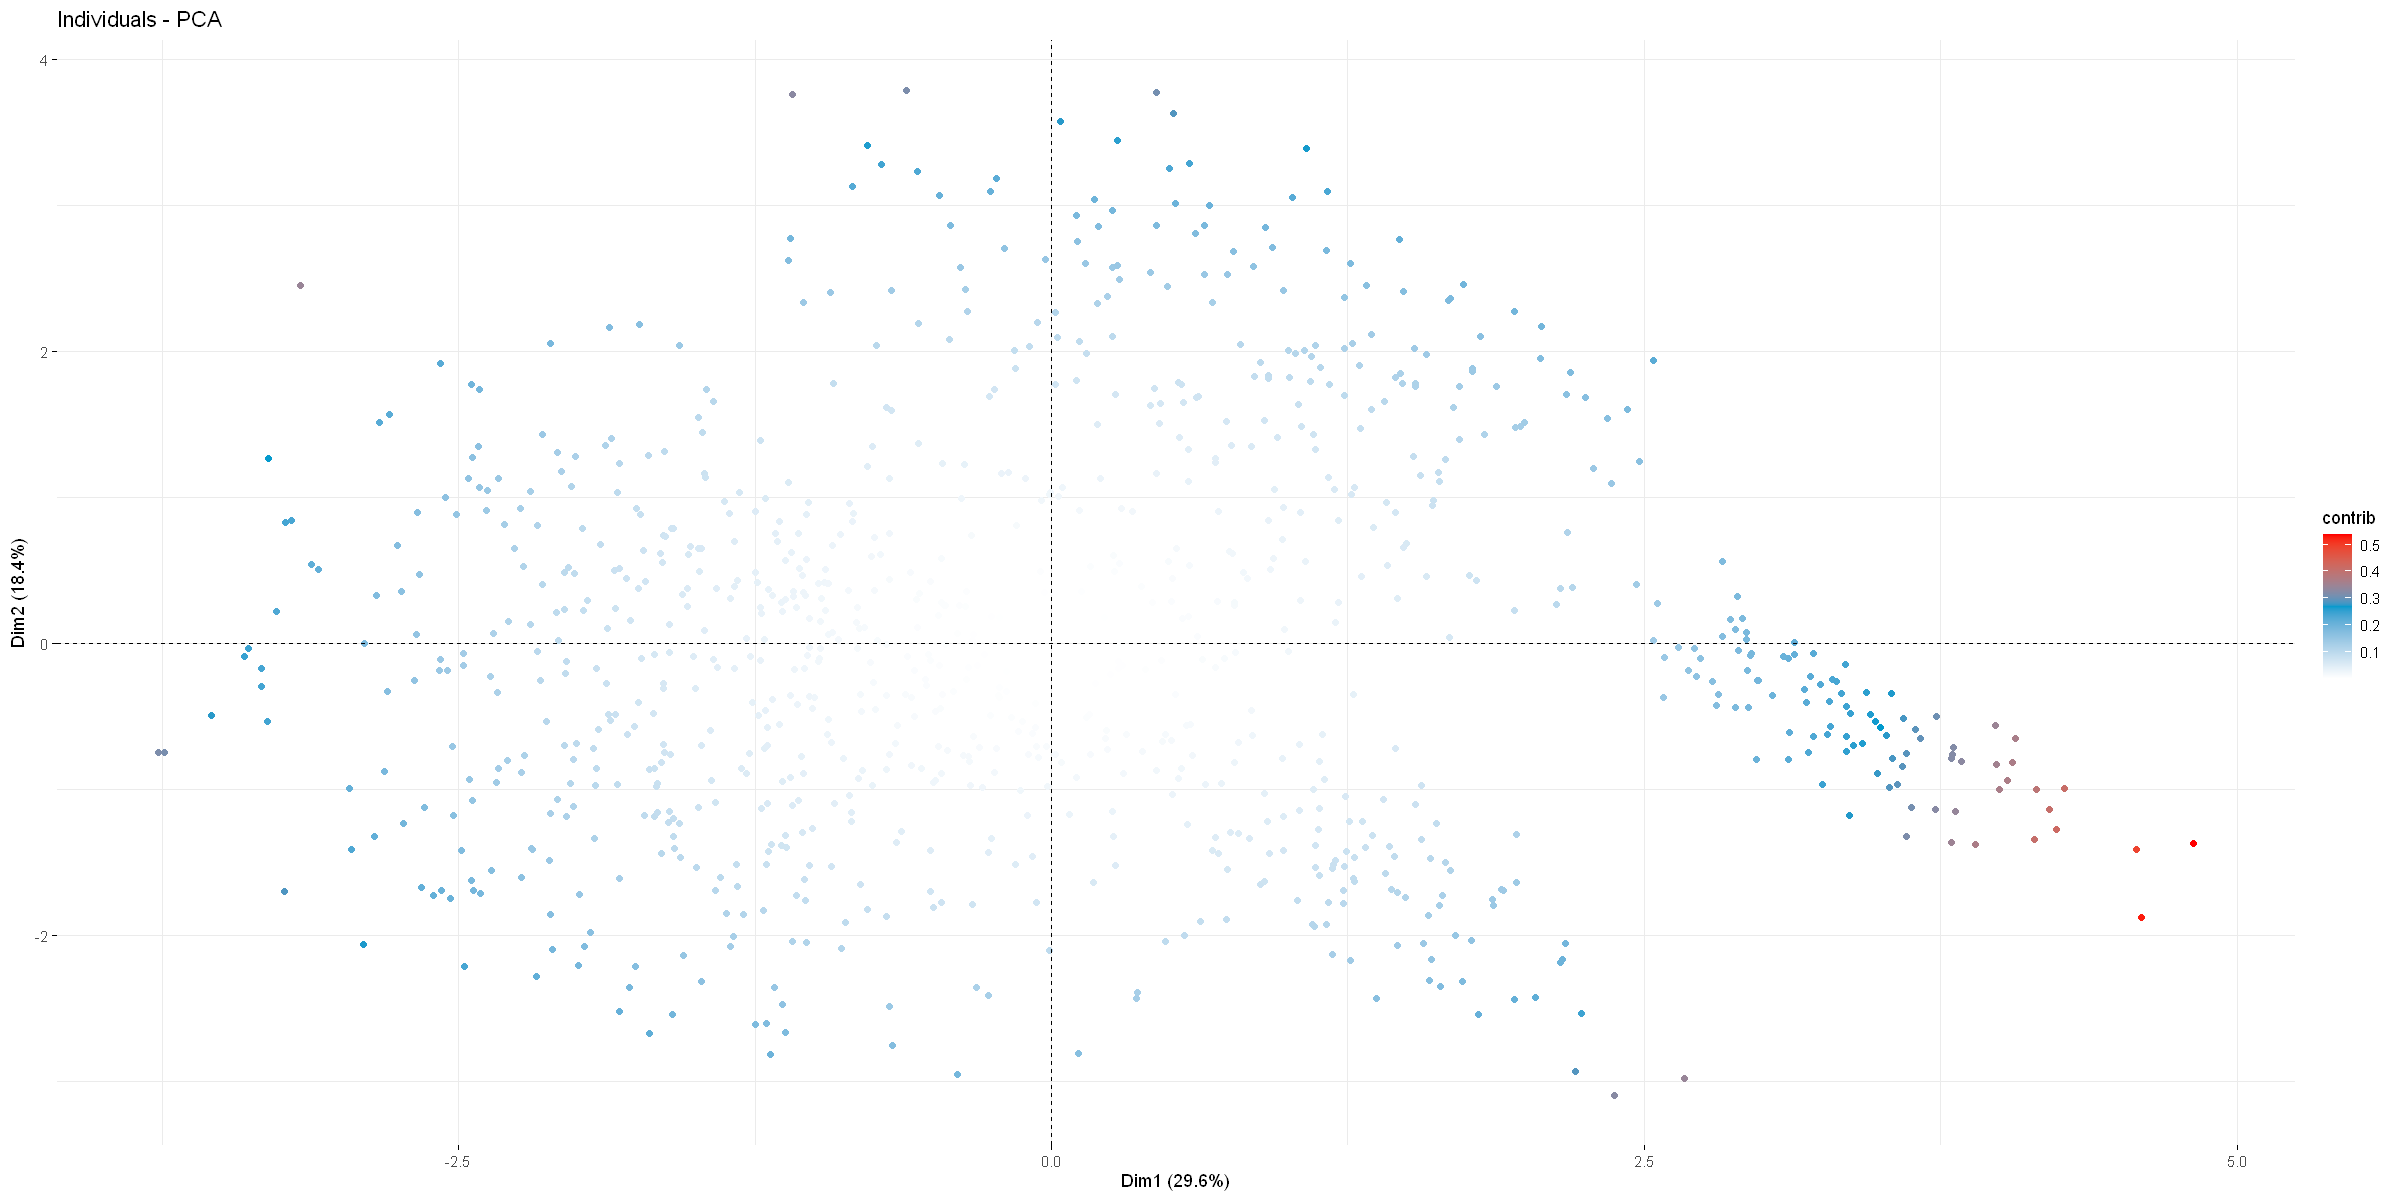

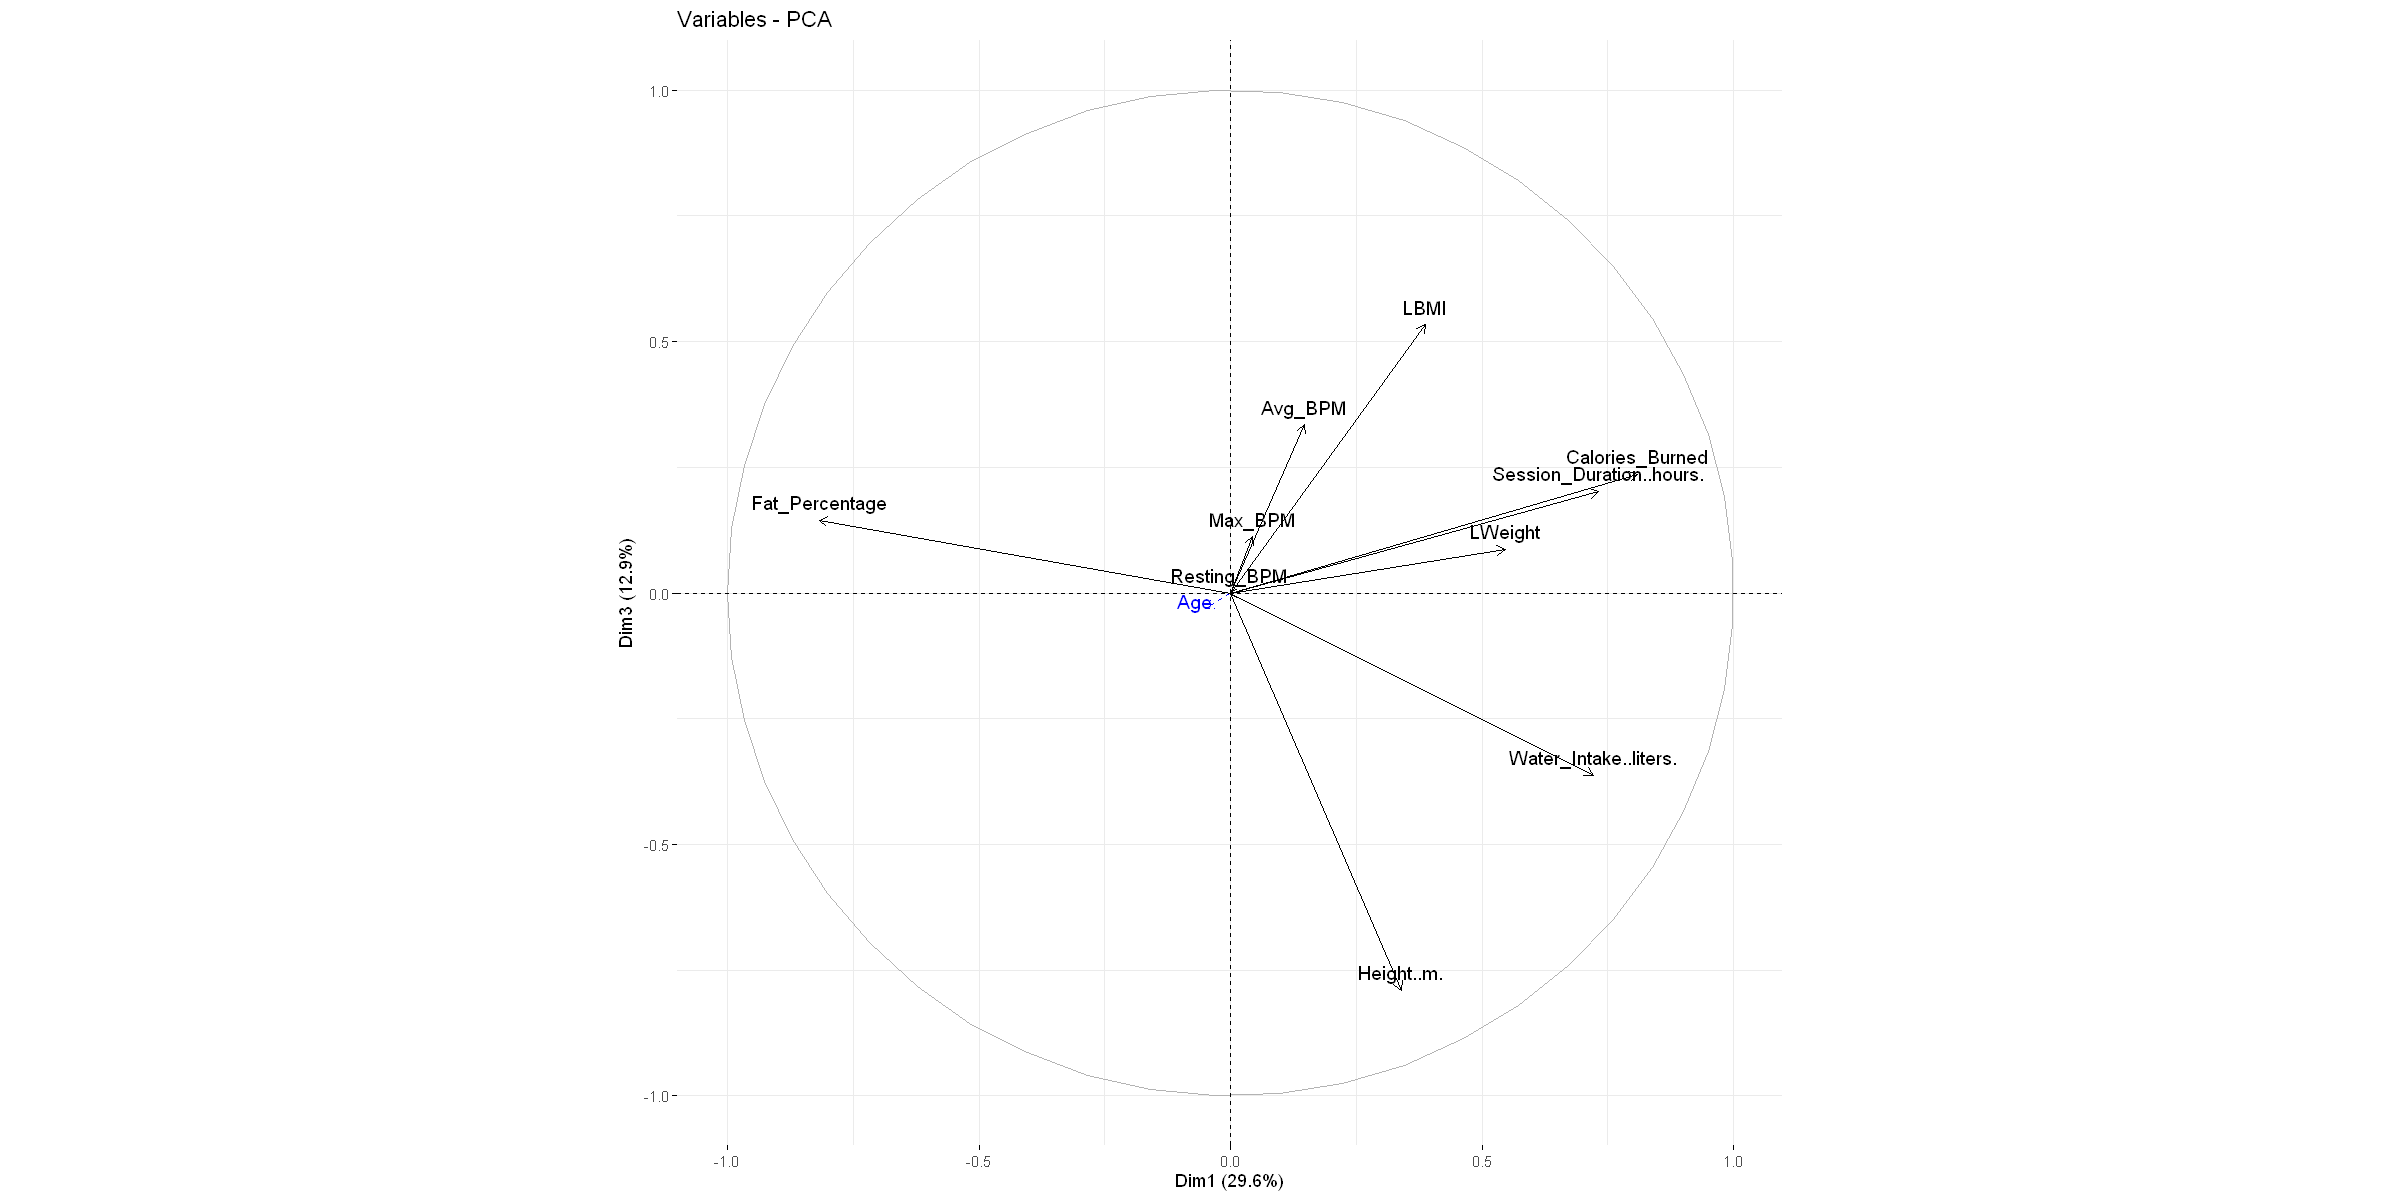

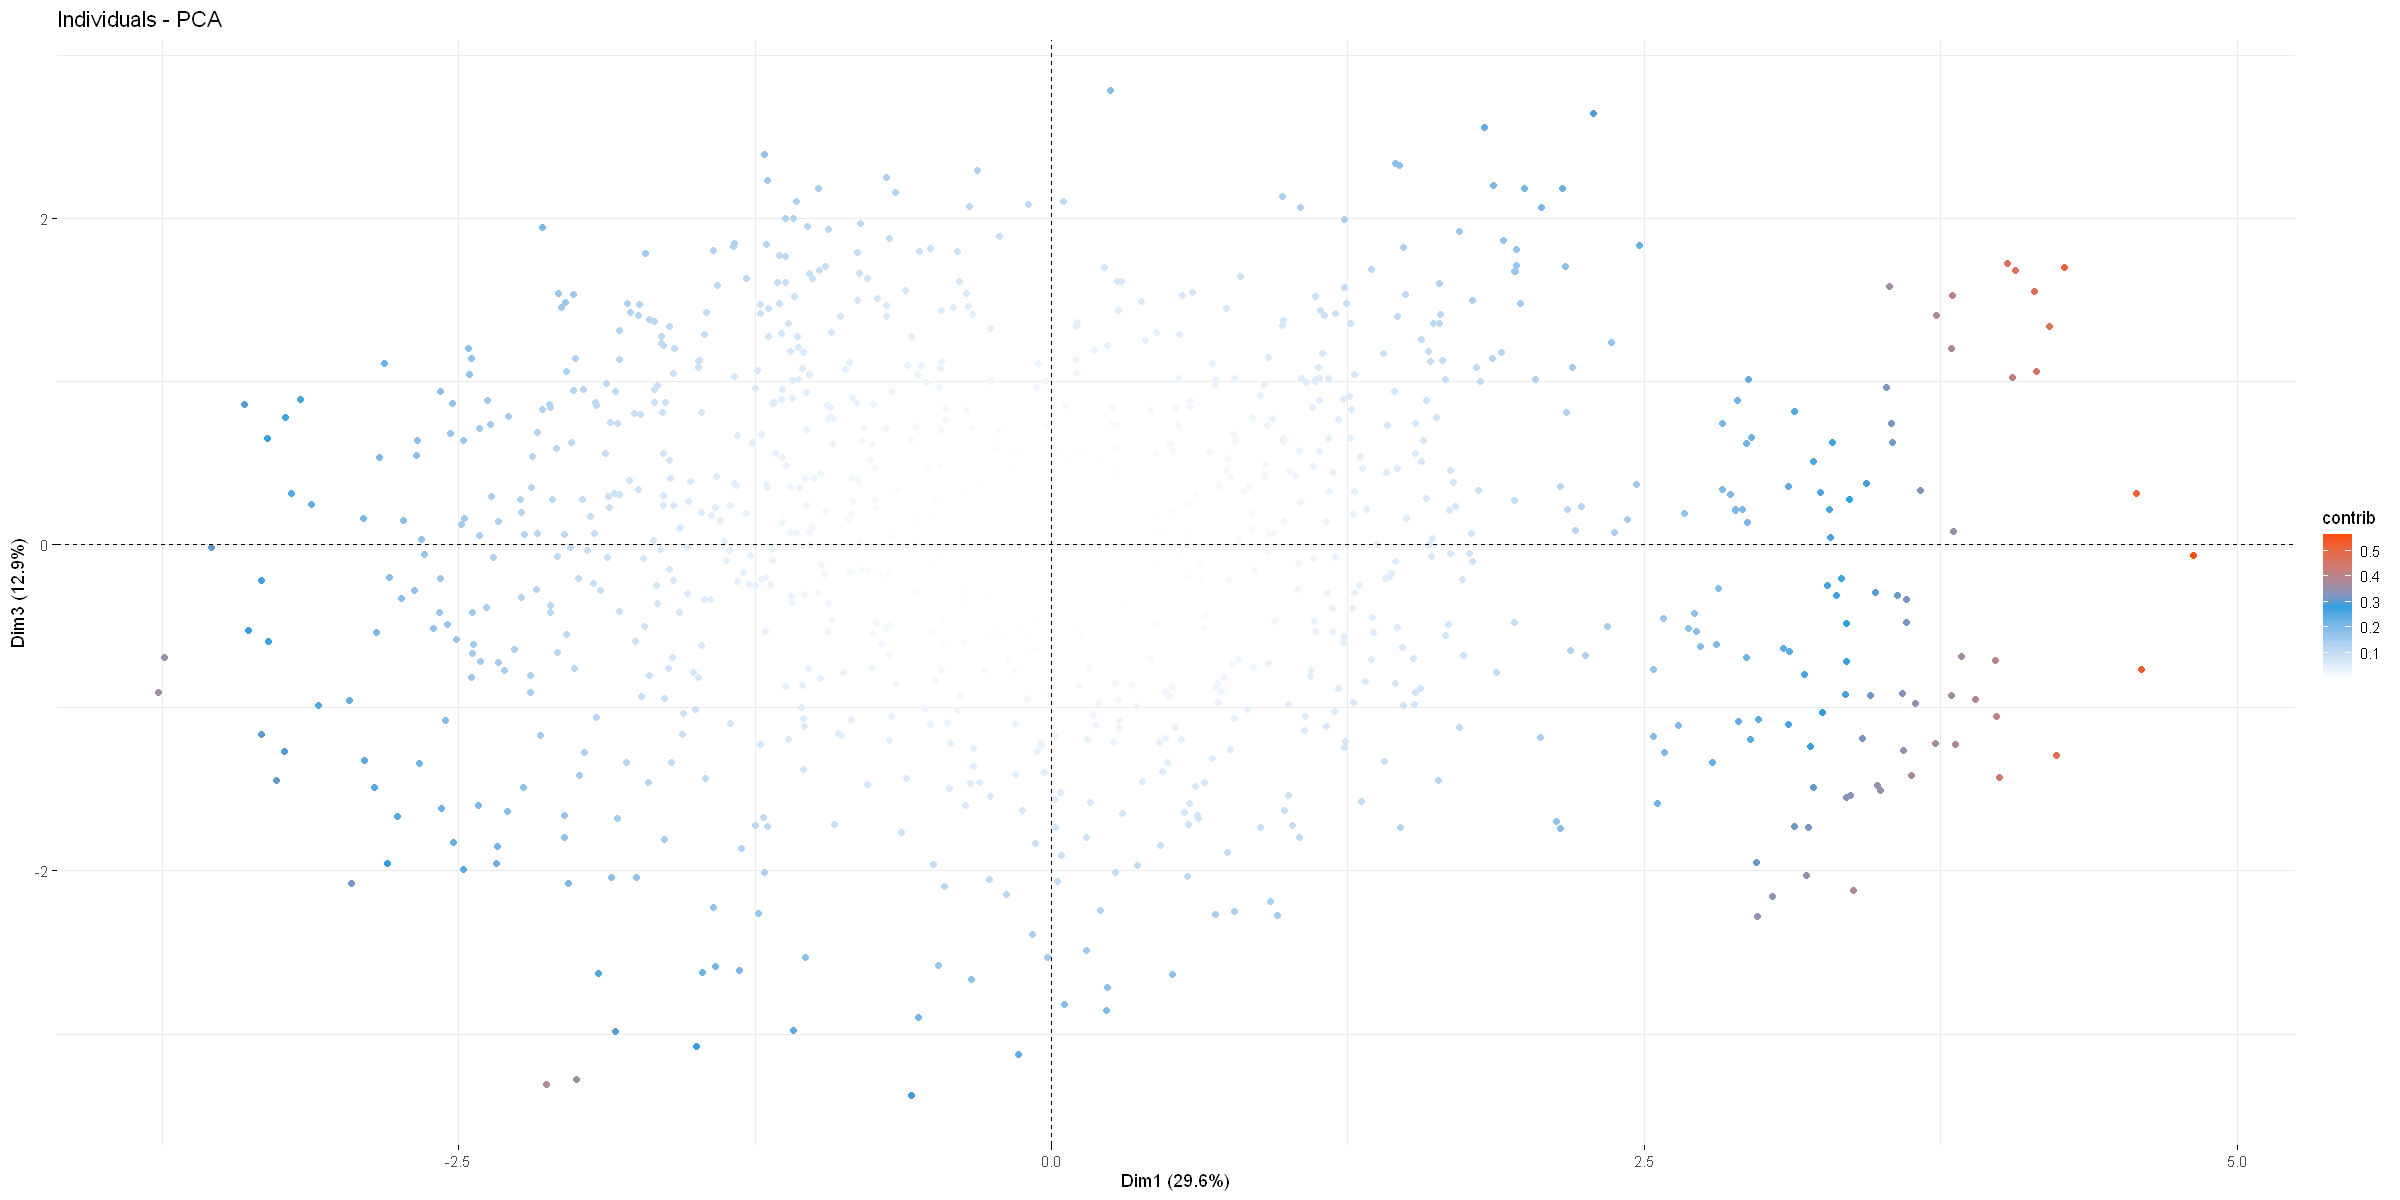

In [25]:
fviz_pca_var(acp)
fviz_pca_ind(acp,col.ind="contrib",label="true",gradient.cols = c("white", "deepskyblue3", "red" ))
fviz_pca_var(acp,axes=c(1,3))
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))

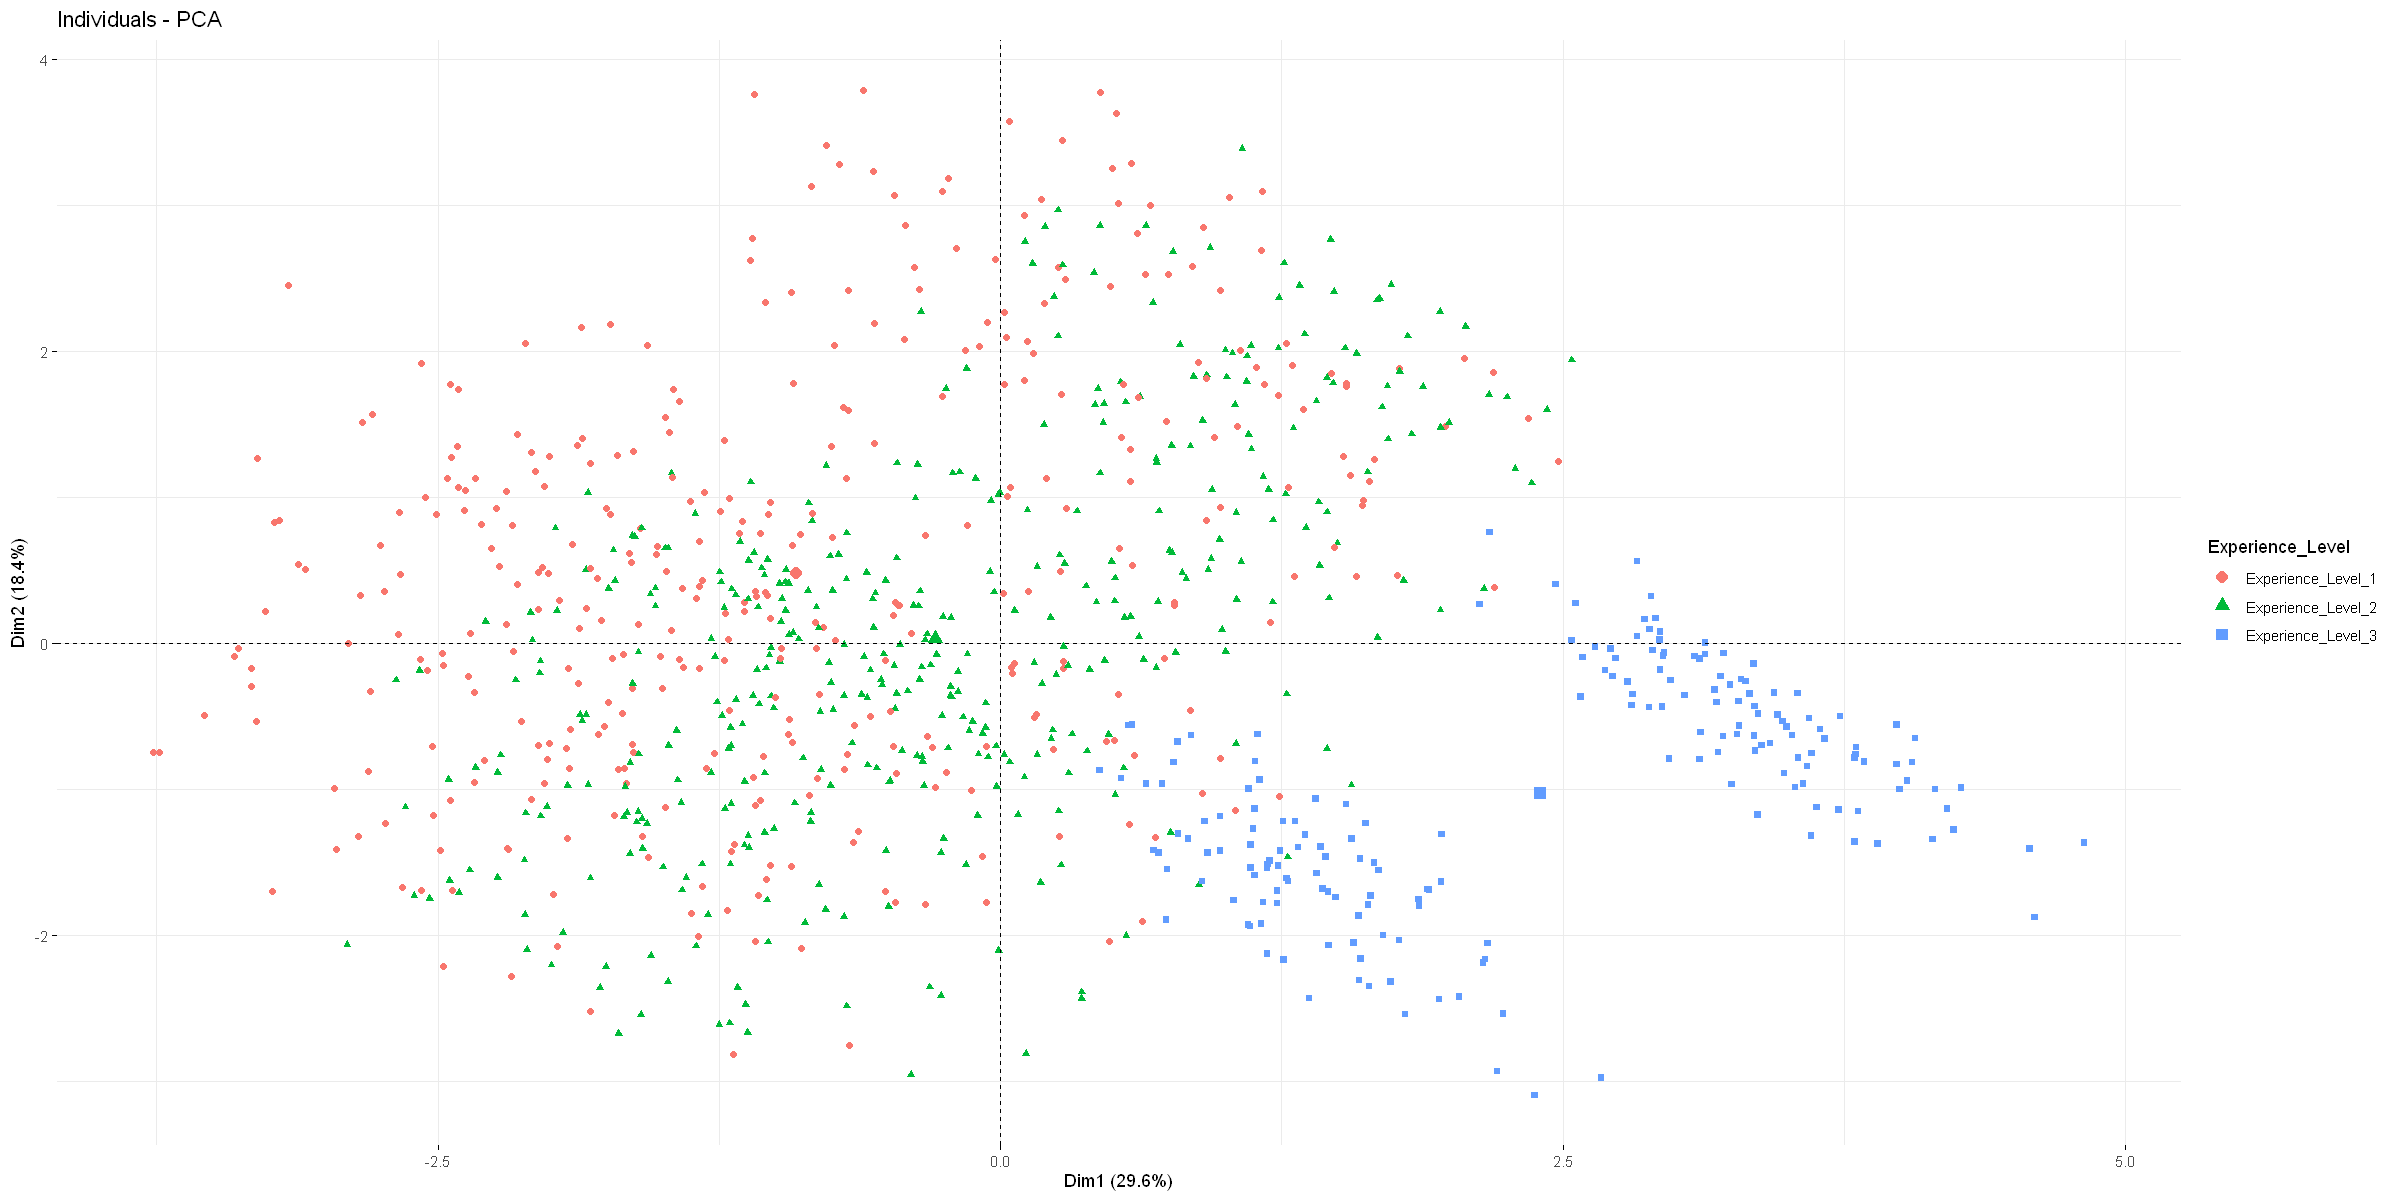

In [43]:
fviz_pca_ind(acp, label="none", habillage = 14, axes=c(1,2))